# Warmup Question 2

From *HealthCare Fraud Detection Capstone Project Proposal.ipynb*

**Summary:**

Beneficiary EDA

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

## Get the data

In [4]:
beneficiary = pd.read_csv('data/archive/Train_Beneficiarydata-1542865627584.csv')
print(beneficiary.shape)
beneficiary.head(2)

(138556, 25)


BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  

[2 rows x 25 columns]

In [5]:
inpatient = pd.read_csv('data/archive/Train_Inpatientdata-1542865627584.csv')
print(inpatient.shape)
inpatient.head(2) 

(40474, 30)


BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  

[2 rows x 30 columns]

In [6]:
outpatient = pd.read_csv('data/archive/Train_Outpatientdata-1542865627584.csv')
print(outpatient.shape)
outpatient.head(2)

(517737, 27)


BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                  56409  
1                 0                  79380  

[2 rows x 27 columns]

In [7]:
labels = pd.read_csv('data/archive/Train-1542865627584.csv')
print(labels.shape)
labels.head(2)

(5410, 2)


Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes

### Warmup Question 2:
- Study the relationship between the patient ages (at the time of their service) and the counts 
of medical claims.
- Study the relationship between the patient age and their chornic conditions.
Within the train-samples, do these chronic conditions show a definite trend with respect to increasing
 ages?
- In order to make sure the insurance premiums can cover the claims, the insurance company would 
need to categorize the patients according to their resource usage.
In answering the question that what types of patients would make more outpatient visits, please 
provide your finding.
- In answering what types of patients would make more inpatient service claims, please provide
your findings.
- From the prospect of the insurance company, the reimbursed amounts are their coverage on the
claims.  Please analyze the patterns of the total reimbursed amounts 
(or average reimbursed amounts/visit) vs different types of patients.
- From the prospect of the providers, the sum of reimbursed amounts and deductibles are flowing
to the providers. Based on this, analyze which types of patients contribute more to the 
providers in terms of the aggregate charges or the average charge per visit. 

# Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

Create a column that records age of patient at time of service in inpatient and outpatient dataframes

In [10]:
beneficiary.head(2)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  

[2 rows x 25 columns]

In [11]:
inpatient.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   
2      PHY324689  2009-09-17  ...                NaN                 NaN   
3      PHY349768  2009-02-14  ...              25062               40390   
4            NaN  2009-08-13  ...               5119               29620   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   
2                NaN                 NaN                NaN   
3               4019                 NaN              331.0   
4              20300                 NaN             3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

In [12]:
# merge DOB data on BeneID for IP/OP datasets
inpatient_df = inpatient.merge(beneficiary[['BeneID', 'DOB']],
                                   on='BeneID',
                                   how='left')
outpatient_df = outpatient.merge(beneficiary[['BeneID', 'DOB']],
                                   on='BeneID',
                                   how='left')

In [13]:
outpatient_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_10  \
0            NaN              78943  ...                 NaN   
1            NaN               6115  ...                 NaN   
2            NaN               2723  ...                 NaN   
3            NaN              71988  ...                 NaN   
4            NaN              82382  ...                 NaN   

  ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_5 ClmProcedureCode_6 DeductibleAmtPaid  \
0                NaN                NaN                 0   
1                NaN                NaN                 0   
2                NaN                NaN                 0   
3                NaN                NaN                 0   
4                NaN                NaN                 0   

  ClmAdmitDiagnosisCode         DOB  
0                 56409  1936-09-01  
1                 79380  1936-08-01  
2                   NaN  1936-08-01  
3                   NaN  1922-07-01  
4                 71947  1922-07-01  

[5 rows x 28 columns]

In [14]:
# change date features to datetime objects
inpatient_df['DOB'] = pd.to_datetime(inpatient_df['DOB'])
outpatient_df['DOB'] = pd.to_datetime(outpatient_df['DOB'])

inpatient_df['ClaimStartDt'] = pd.to_datetime(inpatient_df['ClaimStartDt'])
outpatient_df['ClaimStartDt'] = pd.to_datetime(outpatient_df['ClaimStartDt'])

inpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  object        
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  object        
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  object

In [15]:
# add a column for age at time of service (ClaimStartDt)
inpatient_df['age_at_time_of_service'] = ((
    inpatient_df['ClaimStartDt'] - inpatient_df['DOB']
).dt.days / 365.25).astype(int)


outpatient_df['age_at_time_of_service'] = ((
    outpatient_df['ClaimStartDt'] - outpatient_df['DOB']
).dt.days / 365.25).astype(int)

In [16]:
outpatient_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureCode_1  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723  ...                NaN   
3            NaN              71988  ...                NaN   
4            NaN              82382  ...                NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6 DeductibleAmtPaid ClmAdmitDiagnosisCode        DOB  \
0                NaN                 0                 56409 1936-09-01   
1                NaN                 0                 79380 1936-08-01   
2                NaN                 0                   NaN 1936-08-01   
3                NaN                 0                   NaN 1922-07-01   
4                NaN                 0                 71947 1922-07-01   

   age_at_time_of_service  
0                      73  
1                      72  
2                      72  
3                      86  
4                      86  

[5 rows x 29 columns]

In [17]:
# add a column with the counts for number of claims per beneficiary
inpatient_df.loc[:, 'total_claims'] = inpatient_df.groupby('BeneID')['BeneID'].transform('count')
outpatient_df.loc[:, 'total_claims'] = outpatient_df.groupby('BeneID')['BeneID'].transform('count')
inpatient_df.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_10  ClmProcedureCode_1  \
0            NaN  2009-04-12  ...                 NaN                 NaN   
1            NaN  2009-08-31  ...                 NaN              7092.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6        DOB age_at_time_of_service total_claims  
0                NaN 1943-01-01                     66            3  
1                NaN 1943-01-01                     66            3  

[2 rows x 33 columns]

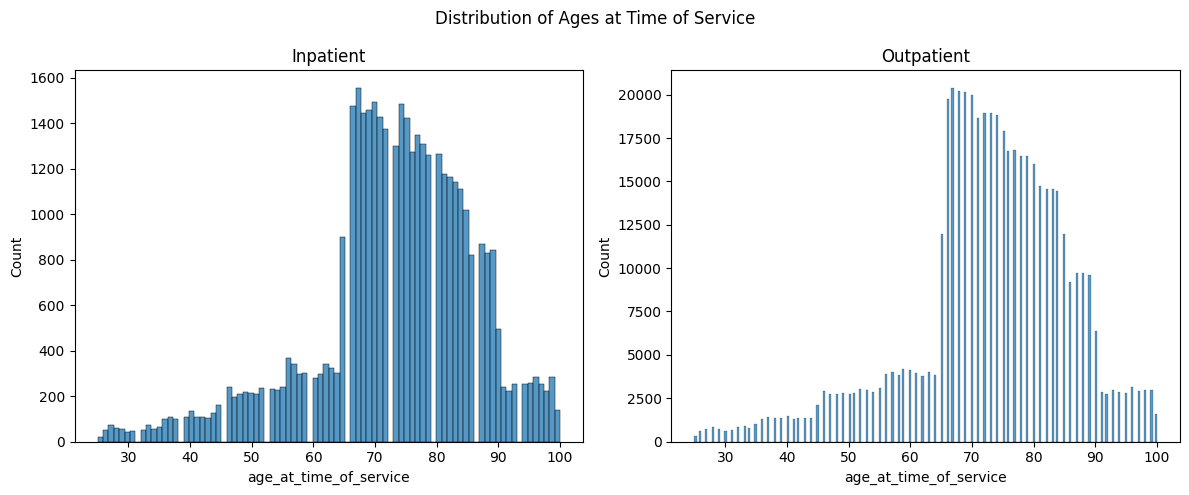

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient_df['age_at_time_of_service'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient_df['age_at_time_of_service'], ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Ages at Time of Service')
plt.tight_layout() 
plt.show()

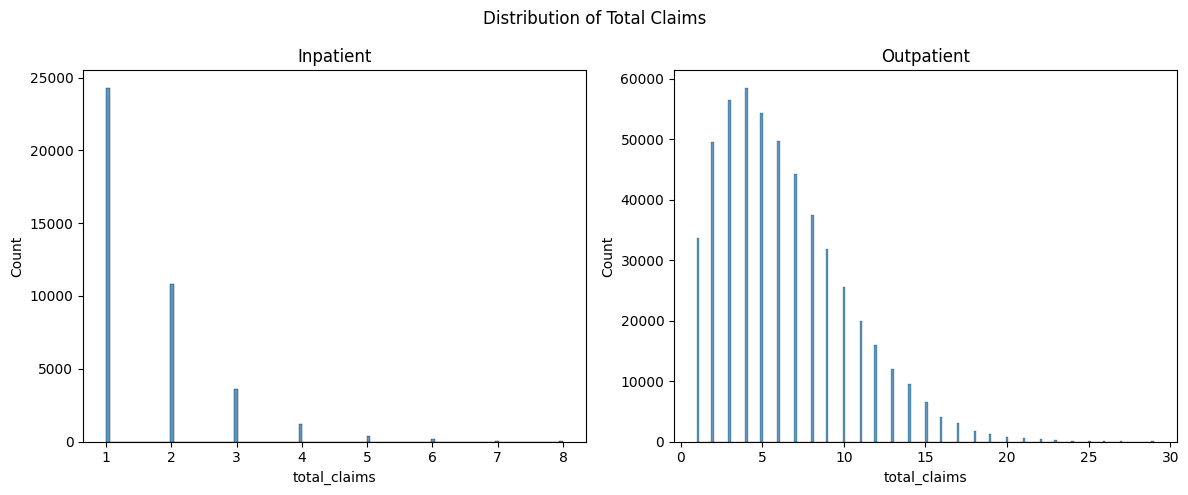

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient_df['total_claims'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient_df['total_claims'], ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Distribution of Total Claims')
plt.tight_layout() 
plt.show()

In [20]:
print('INPATIENT percentage of total claims:')
print(inpatient_df['total_claims'].value_counts()/len(inpatient_df['total_claims']))
print('OUTPATIENT percentage of total claims:')
print(outpatient_df['total_claims'].value_counts()/len(outpatient_df['total_claims']))

INPATIENT percentage of total claims:
total_claims
1    0.599916
2    0.266640
3    0.088798
4    0.029945
5    0.009636
6    0.004003
7    0.000865
8    0.000198
Name: count, dtype: float64
OUTPATIENT percentage of total claims:
total_claims
4     0.112860
3     0.109121
5     0.104995
6     0.095898
2     0.095728
7     0.085489
8     0.072222
1     0.064958
9     0.061328
10    0.049485
11    0.038562
12    0.030734
13    0.023327
14    0.018388
15    0.012487
16    0.007819
17    0.006042
18    0.003372
19    0.002422
20    0.001468
21    0.001055
22    0.000680
23    0.000622
24    0.000324
27    0.000209
25    0.000193
29    0.000112
26    0.000100
Name: count, dtype: float64


INPATIENT:
- 60% of inpatients file 1 claim
- 96% of inpatients file as many as 3 claims, leaving
- 4% filing 4 or more claims

OUTPATIENT:
- most outpatients (11%) file 4 claims, with an almost equal percentage filing 3 or 5 claims.
- 52% file between 2 and 6 claims

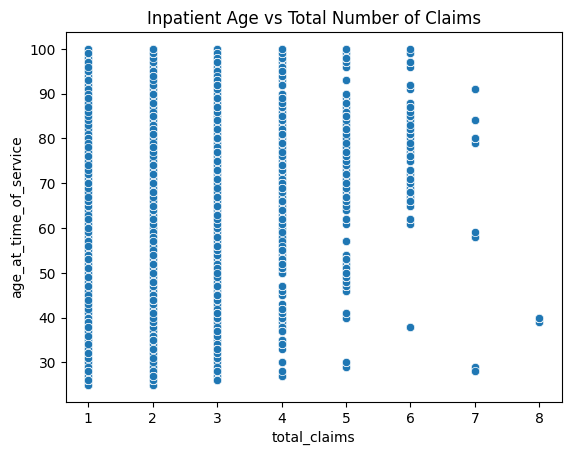

In [22]:
sns.scatterplot(x='total_claims',
               y='age_at_time_of_service',
               data=inpatient_df)
plt.title('Inpatient Age vs Total Number of Claims')
plt.show()

There is a pretty uniform distribution of ages filing for 1, 2, 3 and 4 claims. The age range begins to narrow with 5 and 6 claims, i.e. younger inpatients are not as represented in these groups. There are few incidences of inpatients filing for 7 and 8 claims. Odd to see the 8-claim group is so young. 

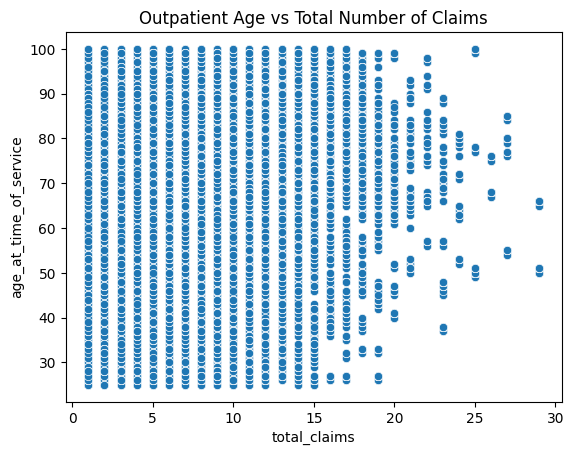

In [24]:
sns.scatterplot(x='total_claims',
               y='age_at_time_of_service',
               data=outpatient_df)
plt.title('Outpatient Age vs Total Number of Claims')
plt.show()

Outpatients filing for as many as 15 claims seem to be from every age group. The age narrows as claims exceed 16 with fewer outpatients from the youngest and oldest groups.

There is a batch of much older outpatients filing 25 claims, and then what might (?) be a small group of middle aged patients filing for more claims. 

# Study the relationship between the patient age and their chronic conditions. Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages? 

### create a column with counts of chronic conditions associated with each beneficiary. Do not include renal disease. 

In [28]:
beneficiary.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

No missing values in the Chronic condition columns.

All the chronic condition columns are either 1 or 2. Need to count 1s or 2s

In [30]:
# create a copy of beneficiary dataframe to modify
beneficiary_df = beneficiary.copy()

# create list of 11 chronic condition columns
chronic_cond_cols = [
    'ChronicCond_Alzheimer',
    'ChronicCond_Heartfailure',
    'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer',
    'ChronicCond_ObstrPulmonary',
    'ChronicCond_Depression',
    'ChronicCond_Diabetes',
    'ChronicCond_IschemicHeart',
    'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis',
    'ChronicCond_stroke'
]

beneficiary_df['chronic_cond_1_counts'] = beneficiary_df[chronic_cond_cols].eq(1).sum(axis=1)
beneficiary_df.head(5)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         2   
1                     2                          2                         2   
2                     2                          1                         2   
3                     1                          1                         1   
4                     1                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  chronic_cond_1_counts  
0                     70                      7  
1                     50                      0  
2                     40                      2  
3                    760                      6  
4                   1200                      2  

[5 rows x 26 columns]

In [31]:
# clean up the dataframe, dropping 11 ChronicCond_# columns
beneficiary_df.drop(columns=chronic_cond_cols, axis=1, inplace=True)

In [32]:
# check size of df; should be 15
beneficiary_df.shape

(138556, 15)

In [33]:
beneficiary_df.head(2)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  IPAnnualReimbursementAmt  \
0     230                   12                   12                     36000   
1     280                   12                   12                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                   3204                        60                     70   
1                      0                        30                     50   

   chronic_cond_1_counts  
0                      7  
1                      0

In [34]:
# Add chronic cond_counts to inpatient and outpatient dataframes
inpatient_df = inpatient_df.merge(beneficiary_df[['BeneID', 'chronic_cond_1_counts']],
                                   on='BeneID',
                                   how='left')
outpatient_df = outpatient_df.merge(beneficiary_df[['BeneID', 'chronic_cond_1_counts']],
                                   on='BeneID',
                                   how='left')

In [35]:
inpatient_df

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0       BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1       BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2       BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3       BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4       BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   
...           ...       ...          ...         ...       ...   
40469  BENE159167  CLM69886   2009-09-28  2009-10-02  PRV53671   
40470  BENE159175  CLM74504   2009-11-03  2009-11-06  PRV54981   
40471  BENE159177  CLM76485   2009-11-18  2009-11-22  PRV56588   
40472  BENE159177  CLM79949   2009-12-17  2009-12-18  PRV56575   
40473  BENE159188  CLM69948   2009-09-28  2009-10-06  PRV54765   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                       26000          PHY390922                NaN   
1                        5000          PHY318495          PHY318495   
2                        5000          PHY372395                NaN   
3                        5000          PHY369659          PHY392961   
4                       10000          PHY379376          PHY398258   
...                       ...                ...                ...   
40469                    7000          PHY345332          PHY319565   
40470                    4000          PHY342806          PHY365497   
40471                    3000          PHY423220          PHY332752   
40472                    5000          PHY353156                NaN   
40473                   15000          PHY431177          PHY352941   

      OtherPhysician AdmissionDt  ... ClmProcedureCode_1  ClmProcedureCode_2  \
0                NaN  2009-04-12  ...                NaN                 NaN   
1                NaN  2009-08-31  ...             7092.0                 NaN   
2          PHY324689  2009-09-17  ...                NaN                 NaN   
3          PHY349768  2009-02-14  ...              331.0                 NaN   
4                NaN  2009-08-13  ...             3893.0                 NaN   
...              ...         ...  ...                ...                 ...   
40469            NaN  2009-09-28  ...             9904.0                 NaN   
40470            NaN  2009-11-03  ...             8605.0                 NaN   
40471            NaN  2009-11-18  ...             9390.0                 NaN   
40472            NaN  2009-12-17  ...                NaN                 NaN   
40473            NaN  2009-09-28  ...             1733.0                 NaN   

      ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                    NaN                NaN                NaN   
1                    NaN                NaN                NaN   
2                    NaN                NaN                NaN   
3                    NaN                NaN                NaN   
4                    NaN                NaN                NaN   
...                  ...                ...                ...   
40469                NaN                NaN                NaN   
40470                NaN                NaN                NaN   
40471                NaN                NaN                NaN   
40472                NaN                NaN                NaN   
40473                NaN                NaN                NaN   

      ClmProcedureCode_6        DOB age_at_time_of_service total_claims  \
0                    NaN 1943-01-01                     66            3   
1                    NaN 1943-01-01                     66            3   
2                    NaN 1943-01-01                     66            3   
3                    NaN 1914-03-01                     94            1   
4                    NaN 1938-04-01                     71            1   
...                  ...        ...                    ...          ...   
40469                NaN 1956-12-01                     52            2   
40470      

In [36]:
# create smaller df and drop duplicates
inpatient_chronic_counts = inpatient_df[['BeneID',
                                          'chronic_cond_1_counts', 
                                          'age_at_time_of_service', 
                                          'total_claims']].copy()
outpatient_chronic_counts = outpatient_df[['BeneID',
                                          'chronic_cond_1_counts', 
                                          'age_at_time_of_service', 
                                          'total_claims']].copy()

inpatient_chronic_counts.drop_duplicates(inplace=True)
outpatient_chronic_counts.drop_duplicates(inplace=True)
inpatient_chronic_counts

BeneID  chronic_cond_1_counts  age_at_time_of_service  total_claims
0       BENE11001                      7                      66             3
3       BENE11011                      6                      94             1
4       BENE11014                      5                      71             1
5       BENE11017                      9                      69             1
6       BENE11018                      6                      69             1
...           ...                    ...                     ...           ...
40466  BENE159166                      5                      57             2
40468  BENE159167                      2                      52             2
40470  BENE159175                      3                      56             1
40471  BENE159177                      9                      90             2
40473  BENE159188                      4                      70             1

[33297 rows x 4 columns]

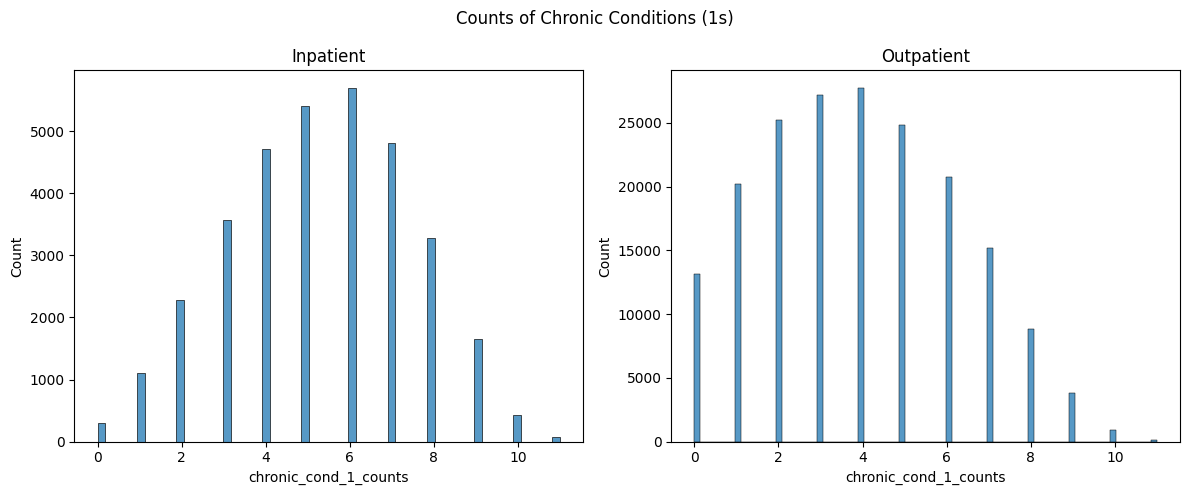

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(inpatient_chronic_counts['chronic_cond_1_counts'], ax=axes[0])
axes[0].set_title('Inpatient')

sns.histplot(outpatient_chronic_counts['chronic_cond_1_counts'], ax=axes[1])
axes[1].set_title('Outpatient')

plt.suptitle('Counts of Chronic Conditions (1s)')
plt.tight_layout() 
plt.show()

In [38]:
print('skew for distribution of inpatient chronic counts (1s):', round(inpatient_chronic_counts['chronic_cond_1_counts'].skew(), 4))
print('skew for distribution of outpatient chronic counts (1s):', round(outpatient_chronic_counts['chronic_cond_1_counts'].skew(), 4))

skew for distribution of inpatient chronic counts (1s): -0.0967
skew for distribution of outpatient chronic counts (1s): 0.2307


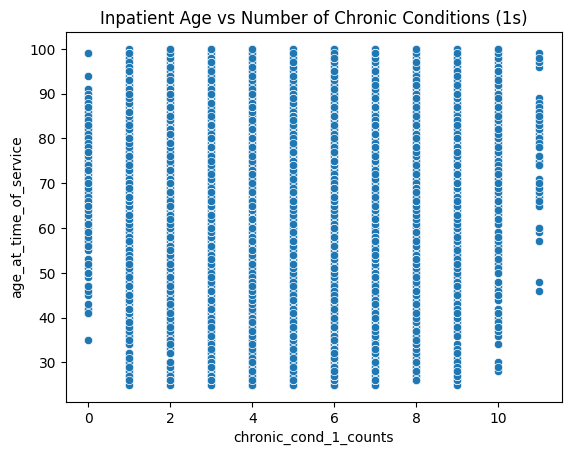

In [39]:
# look at relationship between age and chronic condition counts
sns.scatterplot(x='chronic_cond_1_counts',
               y='age_at_time_of_service',
               data=inpatient_chronic_counts)
plt.title('Inpatient Age vs Number of Chronic Conditions (1s)')
plt.show()

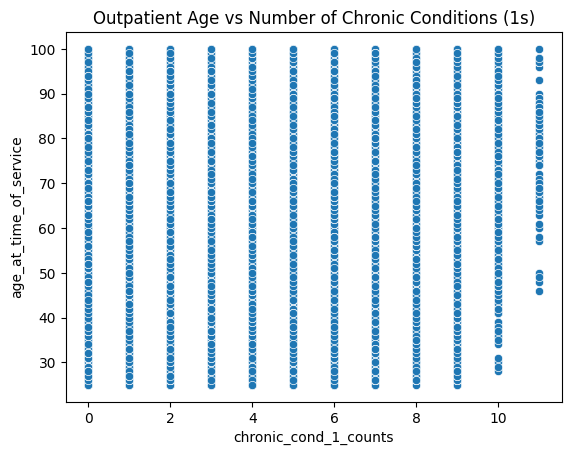

In [40]:
# look at relationship between age and chronic condition counts
sns.scatterplot(x='chronic_cond_1_counts',
               y='age_at_time_of_service',
               data=outpatient_chronic_counts)
plt.title('Outpatient Age vs Number of Chronic Conditions (1s)')
plt.show()

# In order to make sure the insurance premiums can cover the claims, the insurance company would need to categorize the patients according to their resource usage. In answering the question, 'what types of patients would make more outpatient visits', please provide your finding.

Categorize patients based on resource usage: look at 
- OPAnnualReimbursementAmt: total reimbursement for outpatient services during the year
- OPAnnualDeductibleAmt: total deductible paid by beneficiary during the year
- NoOfMonths_Part**B**Cov: number of months the beneficiary had **outpatient** coverage, for scaling

create columns with normalized monthly rates:
- MonthlyReimbursement = OPAnnualReimbursementAmt / NoOfMonths_PartBCov
- MonthlyDeductible = OPAnnualDeductibleAmt / NoOfMonths_PartBCov
- out-of-pocket-ratio (proportion of total costs paid by beneficiary) = OPAnnualDeductibleAmt / OPAnnualReimbursementAmt
- TotalCostPerMonthB (total healthcare spending per covered month) = (OPAnnualReimbursementAmt + OPAnnualDeductibleAmt) / NoOfMonths_PartBCov

Consider patients separately based on (are they different):
- NoMonths_PartBCov = 12 (full-year beneficiaries)
- NoMonths_PartBCov < 12 (partial-year beneficiaries)


look at how this value relates to patient age, gender, race, state (county is too granular?)

In [42]:
outpatient_resource_usage = beneficiary_df.copy()

In [43]:
# create monthly reimbursement column
outpatient_resource_usage['MonthlyReimbursement'] = round(
    outpatient_resource_usage['OPAnnualReimbursementAmt'] / outpatient_resource_usage['NoOfMonths_PartBCov']
, 2)

In [44]:
# create monthly deductible column
outpatient_resource_usage['MonthlyDeductible'] = round(
    outpatient_resource_usage['OPAnnualDeductibleAmt'] / outpatient_resource_usage['NoOfMonths_PartBCov']
, 2)

In [45]:
# create out-of-pocket ratio column
outpatient_resource_usage['OOPRatio'] = round(
    outpatient_resource_usage['OPAnnualDeductibleAmt'] / outpatient_resource_usage['OPAnnualReimbursementAmt']
, 2)

In [46]:
# create total cost per month column, describing cost on behalf of insurer and beneficiary
outpatient_resource_usage['TotalCostPerMonthB'] = round(
    (outpatient_resource_usage['OPAnnualReimbursementAmt'] + outpatient_resource_usage['OPAnnualDeductibleAmt']) / outpatient_resource_usage['NoOfMonths_PartBCov']
, 2)

In [47]:
# create flag for beneficiaries covered year-round
# also: df['YearRoundCoverage'] = np.where(df['NoOfMonths_PartBCov'] == 12, 'Yes', 'No')
outpatient_resource_usage['YearRoundCoverage'] = outpatient_resource_usage['NoOfMonths_PartBCov'].apply(lambda x: 'Yes' if x == 12 else 'No')

In [48]:
outpatient_resource_usage.head(2)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  IPAnnualReimbursementAmt  \
0     230                   12                   12                     36000   
1     280                   12                   12                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                   3204                        60                     70   
1                      0                        30                     50   

   chronic_cond_1_counts  MonthlyReimbursement  MonthlyDeductible  OOPRatio  \
0                      7                   5.0               5.83      1.17   
1                      0                   2.5               4.17      1.67   

   TotalCostPerMonthB YearRoundCoverage  
0               10.83               Yes  
1                6.67               Yes

### determine the age of the beneficiary

Decided to calculate patient age from the beneficiary df relative to the last date in the IP/OP df (end date for data collection), creating a relative age for reference in the beneficiary df. 

In [50]:
print('earliest claim in inpatient:', inpatient['ClaimStartDt'].min())
print('oldest claim in inpatient:', inpatient['ClaimStartDt'].max())

earliest claim in inpatient: 2008-11-27
oldest claim in inpatient: 2009-12-31


In [51]:
print('earliest claim in outpatient:', outpatient['ClaimStartDt'].min())
print('oldest claim in outpatient:', outpatient['ClaimStartDt'].max())

earliest claim in outpatient: 2008-12-12
oldest claim in outpatient: 2009-12-31


No more data was collected after 2009-12-31. Assume this as the date from which to calculate the absolute age of the beneficiary. Will only be off by a year.

In [53]:
# add a 16th column with last date data was collected
beneficiary_df['last_date'] = pd.to_datetime('2009-12-31')
beneficiary_df.head(2)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  IPAnnualReimbursementAmt  \
0     230                   12                   12                     36000   
1     280                   12                   12                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                   3204                        60                     70   
1                      0                        30                     50   

   chronic_cond_1_counts  last_date  
0                      7 2009-12-31  
1                      0 2009-12-31

In [54]:
# change DOB to datetime 
beneficiary_df['DOB'] = pd.to_datetime(beneficiary_df['DOB'])

In [55]:
beneficiary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BeneID                    138556 non-null  object        
 1   DOB                       138556 non-null  datetime64[ns]
 2   DOD                       1421 non-null    object        
 3   Gender                    138556 non-null  int64         
 4   Race                      138556 non-null  int64         
 5   RenalDiseaseIndicator     138556 non-null  object        
 6   State                     138556 non-null  int64         
 7   County                    138556 non-null  int64         
 8   NoOfMonths_PartACov       138556 non-null  int64         
 9   NoOfMonths_PartBCov       138556 non-null  int64         
 10  IPAnnualReimbursementAmt  138556 non-null  int64         
 11  IPAnnualDeductibleAmt     138556 non-null  int64         
 12  OP

In [56]:
# add a column for age of benficiary relative to this date
beneficiary_df['relative_age'] =  ((
    beneficiary_df['last_date'] - beneficiary_df['DOB']
).dt.days / 365.25).astype(int)

In [57]:
beneficiary_df.head(2)

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  IPAnnualReimbursementAmt  \
0     230                   12                   12                     36000   
1     280                   12                   12                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                   3204                        60                     70   
1                      0                        30                     50   

   chronic_cond_1_counts  last_date  relative_age  
0                      7 2009-12-31            66  
1                      0 2009-12-31            73

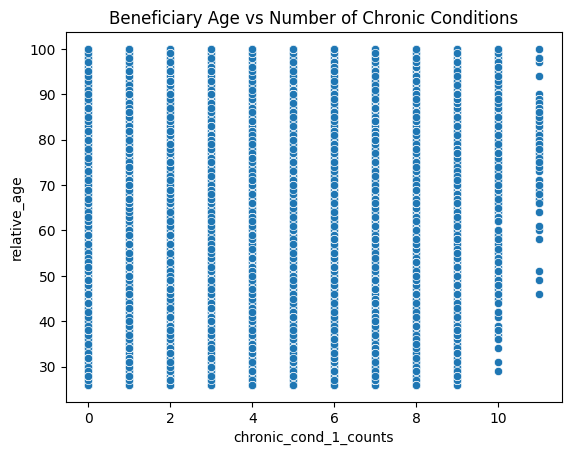

In [58]:
# look at relationship between age and chronic condition counts
sns.scatterplot(x='chronic_cond_1_counts',
               y='relative_age',
               data=beneficiary_df)
plt.title('Beneficiary Age vs Number of Chronic Conditions')
plt.show()

In [59]:
# Merge the dataframes on BeneID, keeping all rows from outpatient_resource_usage
outpatient_resource_usage = outpatient_resource_usage.merge(beneficiary_df[['BeneID', 'relative_age']], on='BeneID', how='left')
outpatient_resource_usage.head(2)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                   3204                        60                     70   
1                      0                        30                     50   

   chronic_cond_1_counts  MonthlyReimbursement  MonthlyDeductible  OOPRatio  \
0                      7                   5.0               5.83      1.17   
1                      0                   2.5               4.17      1.67   

   TotalCostPerMonthB  YearRoundCoverage relative_age  
0               10.83                Yes           66  
1                6.67                Yes           73  

[2 rows x 21 columns]

In [60]:
# to visualize more easily, bin ages by decade
outpatient_resource_usage['AgeGroup'] = pd.cut(
    outpatient_resource_usage['relative_age'], 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 
    labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+'],
    right=False  # makes bins like [0, 10) instead of (0, 10]
)

In [61]:
outpatient_resource_usage.head(2)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  chronic_cond_1_counts  \
0                        60                     70                      7   
1                        30                     50                      0   

   MonthlyReimbursement  MonthlyDeductible  OOPRatio  TotalCostPerMonthB  \
0                   5.0               5.83      1.17               10.83   
1                   2.5               4.17      1.67                6.67   

   YearRoundCoverage  relative_age AgeGroup  
0                Yes            66    60-69  
1                Yes            73    70-79  

[2 rows x 22 columns]

## visualize based on gender, age, race, state of residence

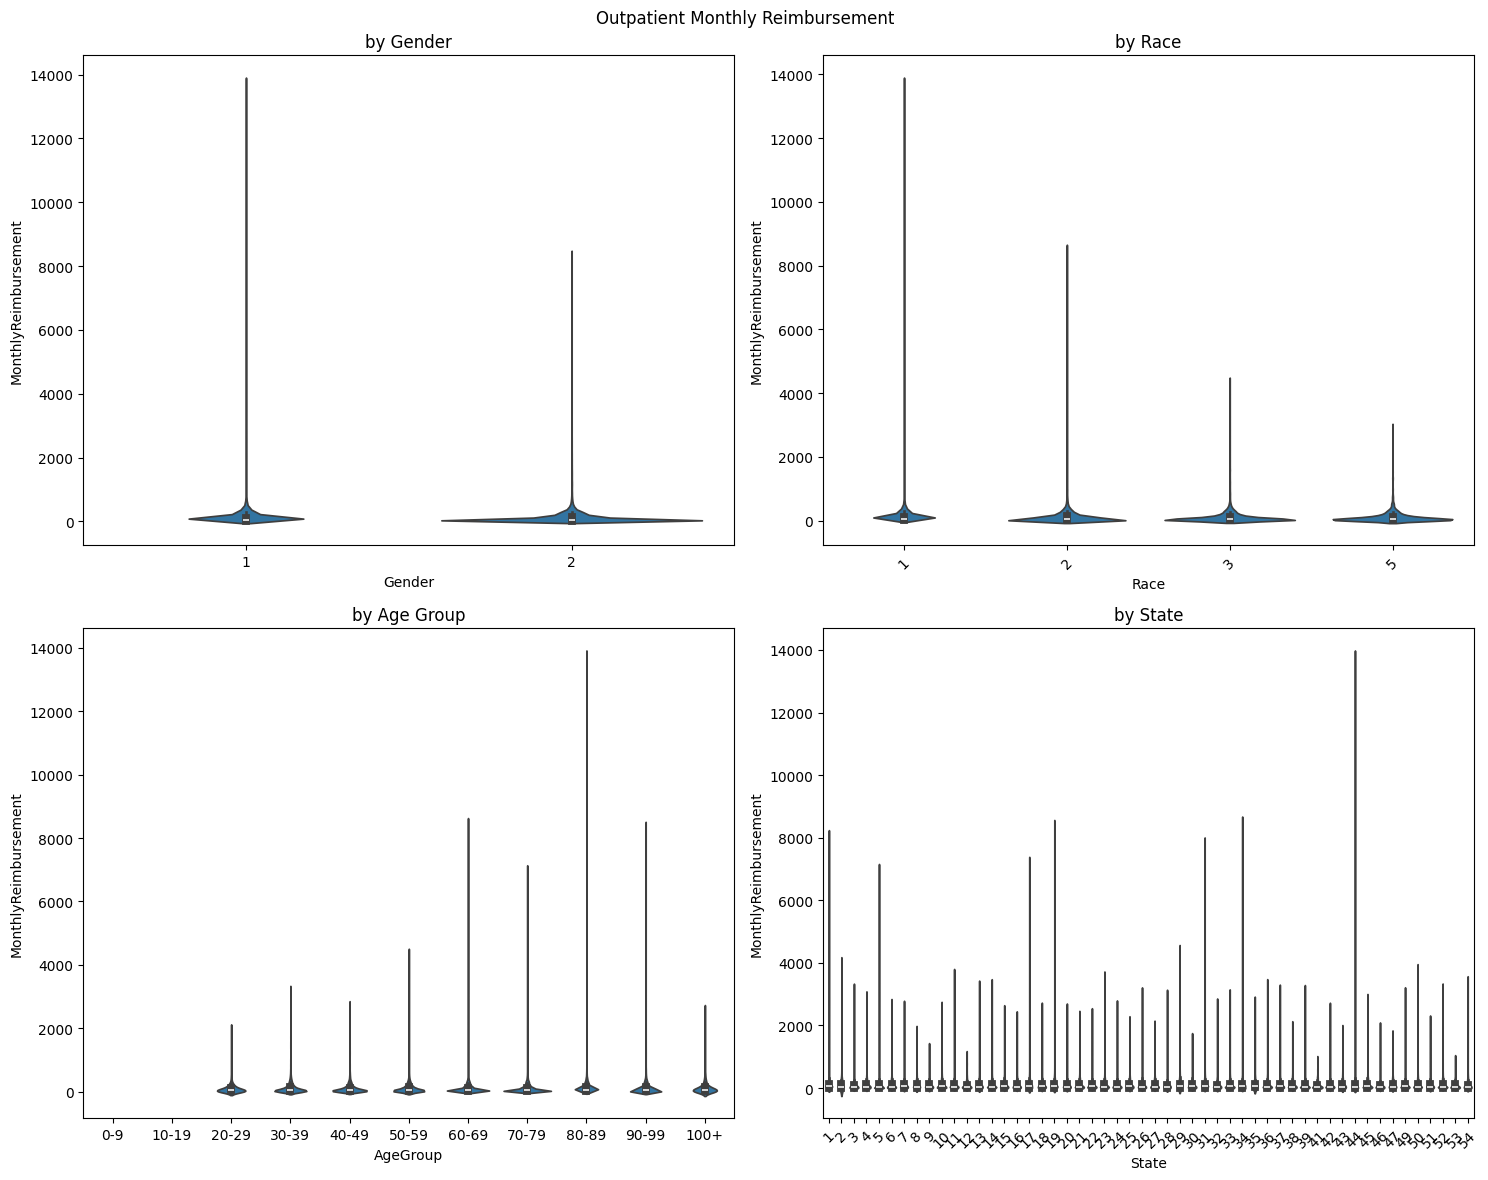

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_resource_usage, x='Gender', y='MonthlyReimbursement', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_resource_usage, x='Race', y='MonthlyReimbursement', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_resource_usage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='MonthlyReimbursement', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Outpatient Monthly Reimbursement')
plt.tight_layout()
plt.show()

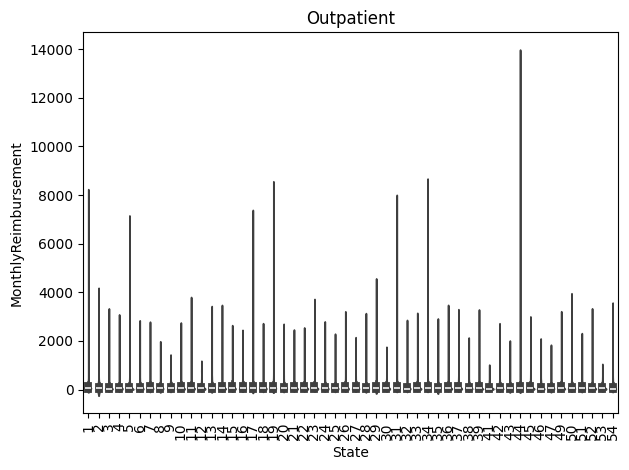

In [64]:
# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='MonthlyReimbursement')

plt.tick_params(axis='x', rotation=90)
plt.title('Outpatient')
plt.tight_layout()
plt.show()

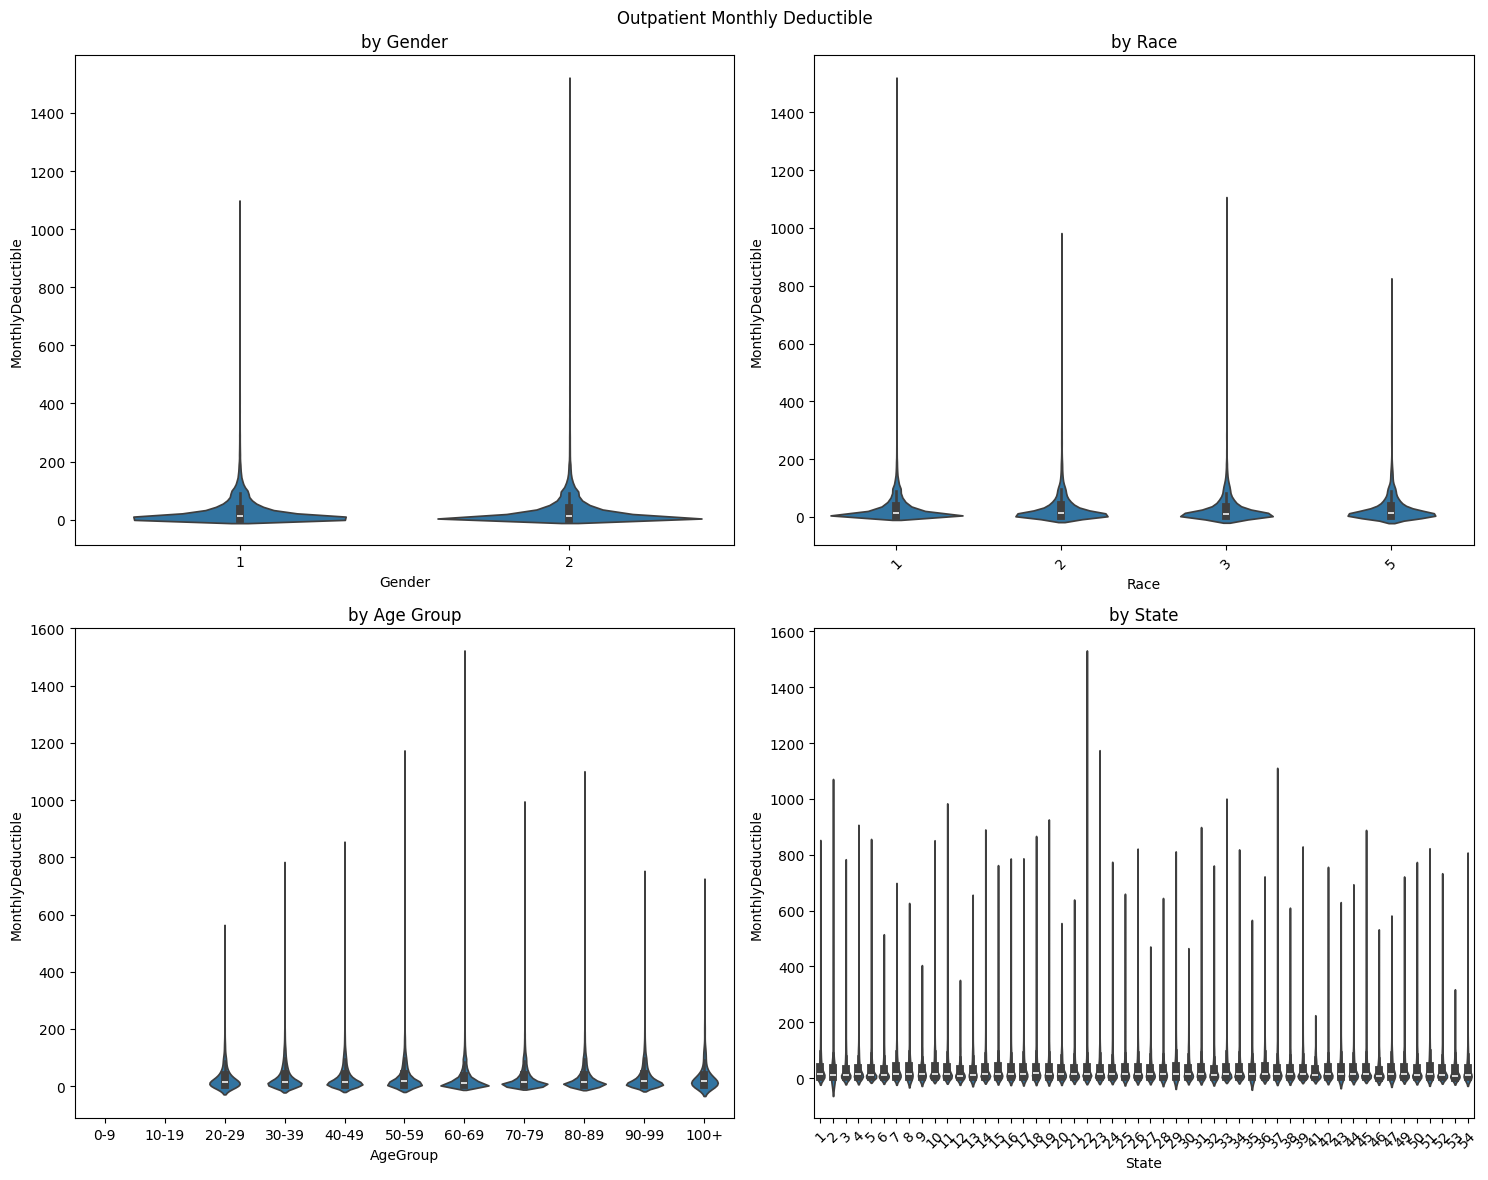

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_resource_usage, x='Gender', y='MonthlyDeductible', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_resource_usage, x='Race', y='MonthlyDeductible', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_resource_usage, x='AgeGroup', y='MonthlyDeductible', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='MonthlyDeductible', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Outpatient Monthly Deductible')
plt.tight_layout()
plt.show()

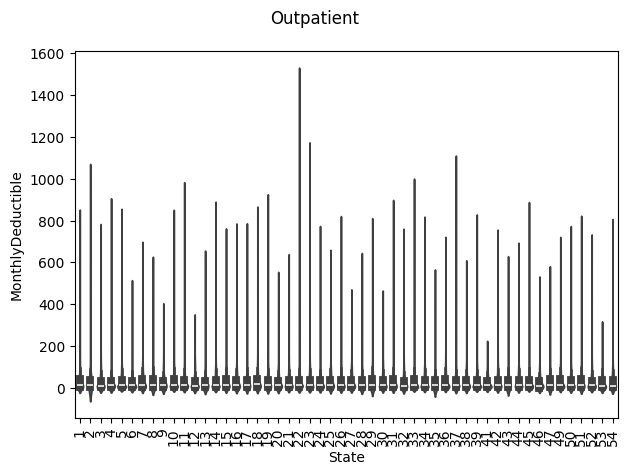

In [66]:
# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='MonthlyDeductible')

plt.tick_params(axis='x', rotation=90)
plt.suptitle('Outpatient')
plt.tight_layout()
plt.show()

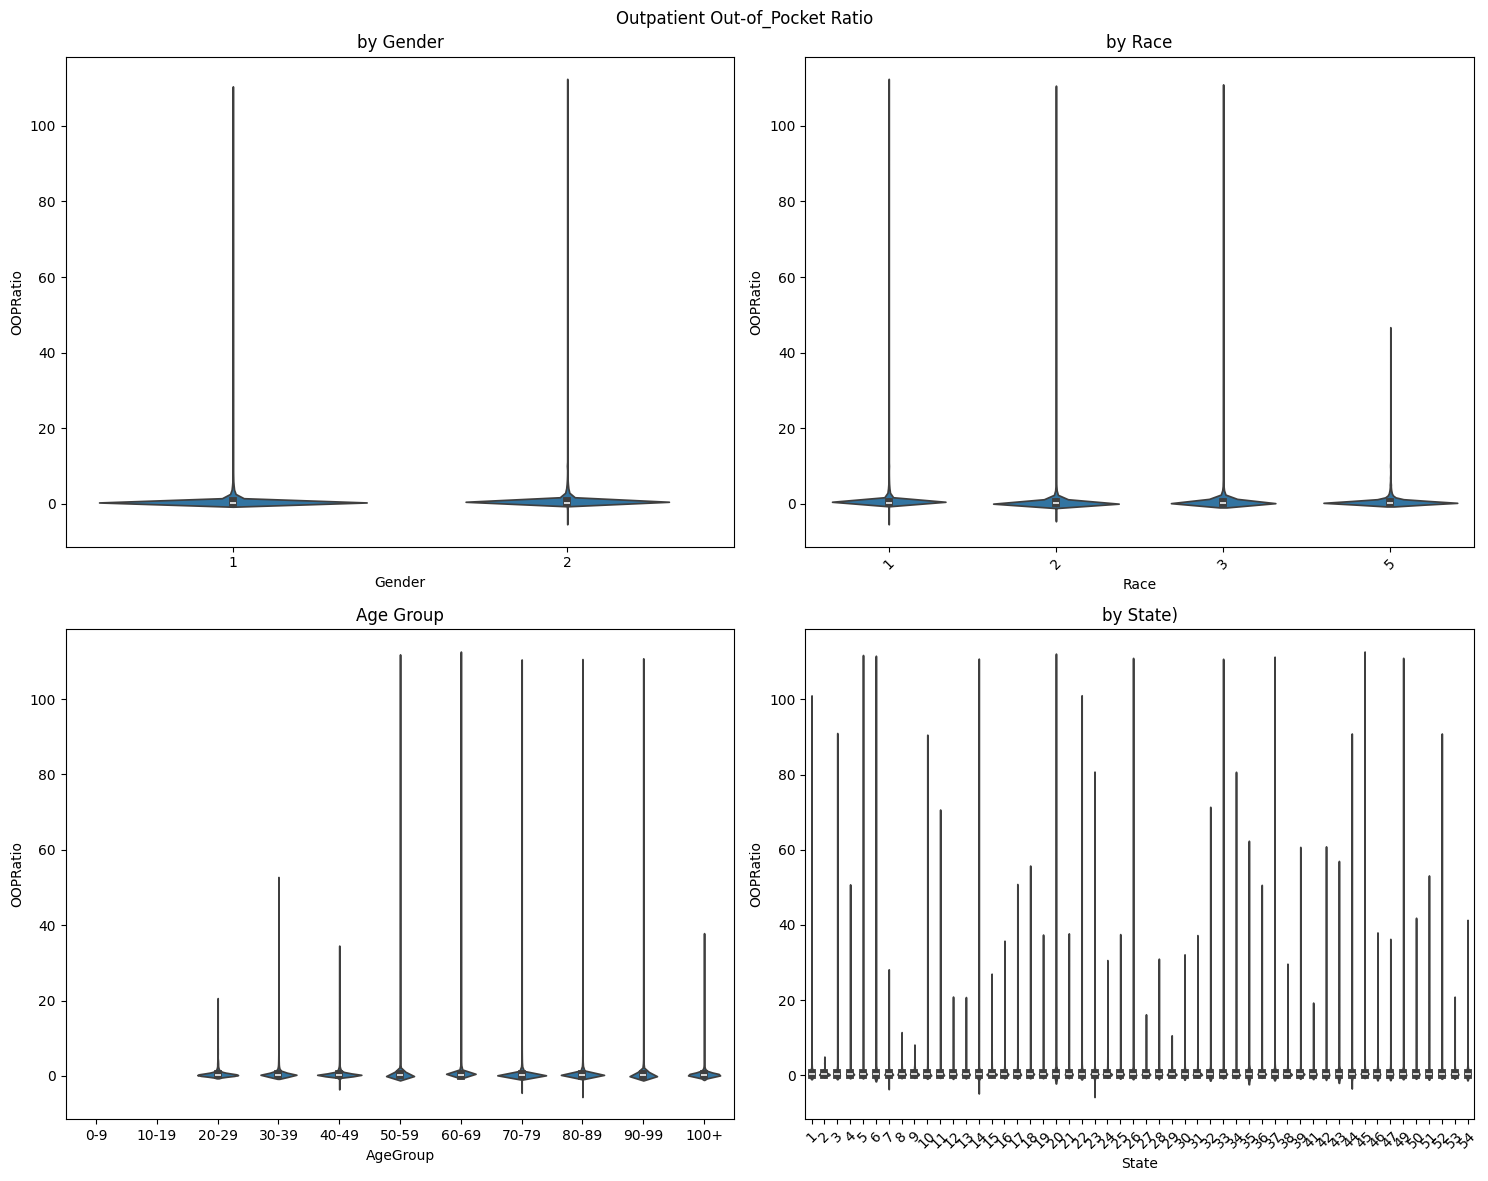

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_resource_usage, x='Gender', y='OOPRatio', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_resource_usage, x='Race', y='OOPRatio', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_resource_usage, x='AgeGroup', y='OOPRatio', ax=axes[1, 0])
axes[1, 0].set_title('Age Group')

# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='OOPRatio', ax=axes[1, 1])
axes[1, 1].set_title('by State)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Outpatient Out-of_Pocket Ratio')
plt.tight_layout()
plt.show()

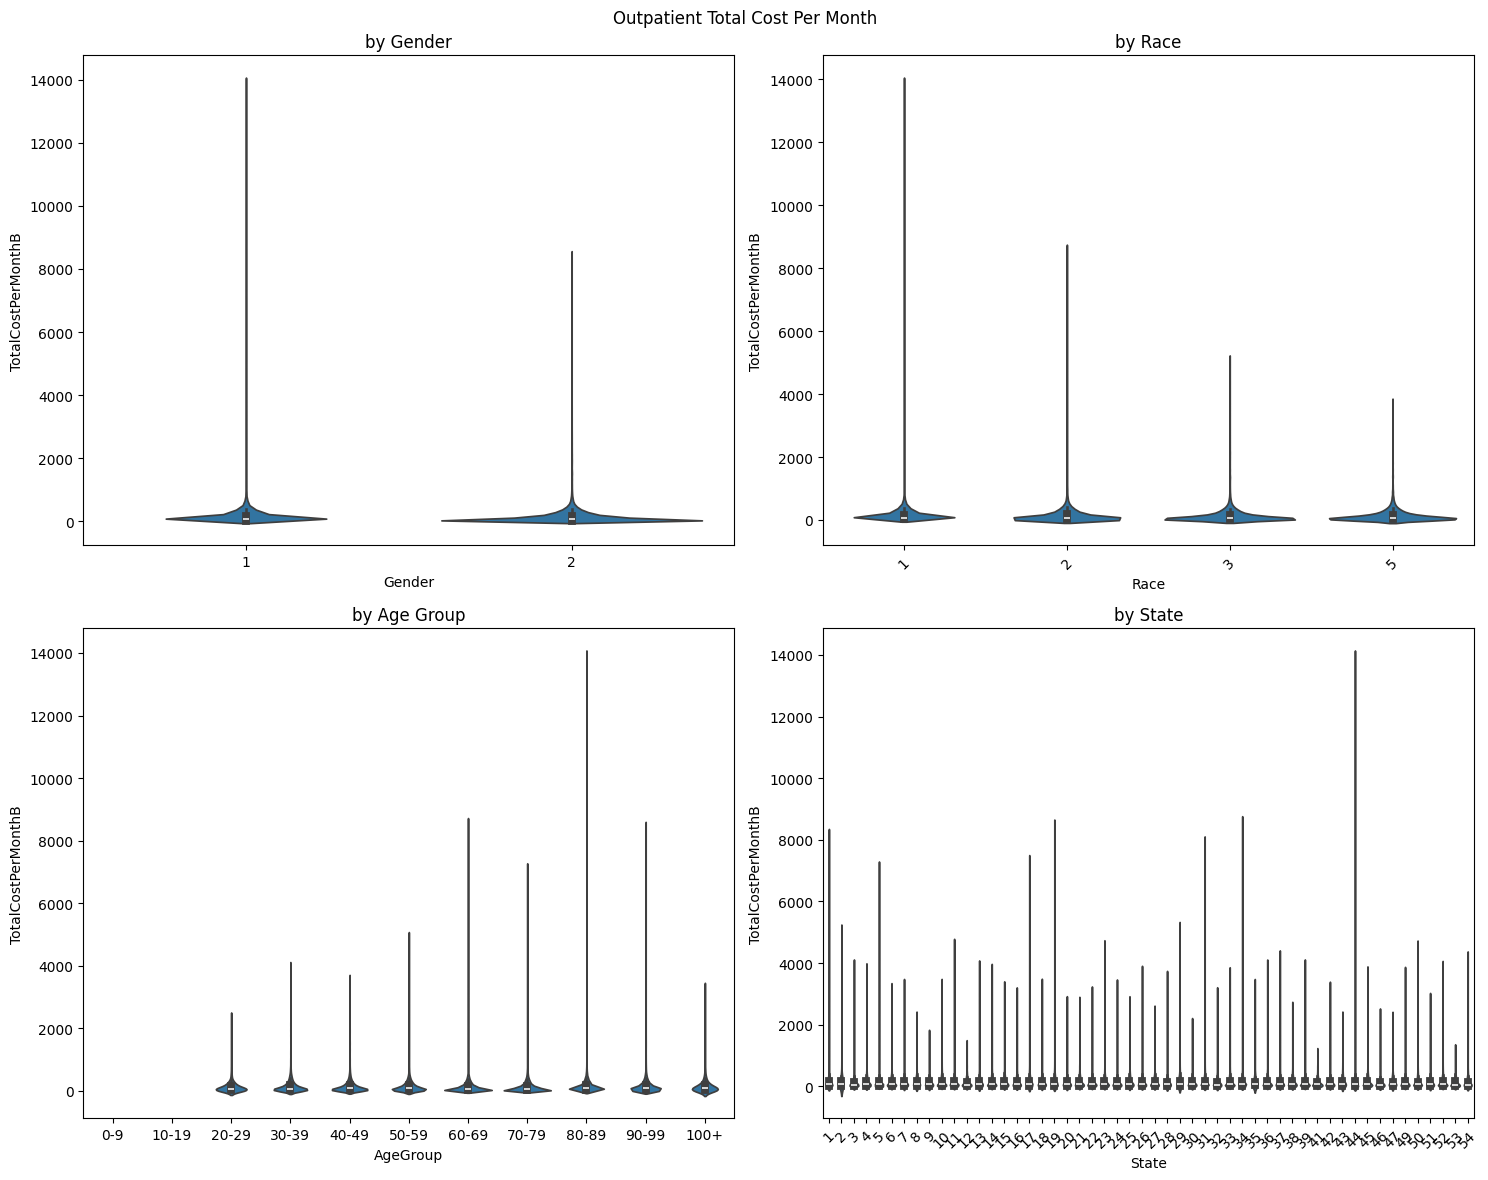

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_resource_usage, x='Gender', y='TotalCostPerMonthB', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_resource_usage, x='Race', y='TotalCostPerMonthB', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_resource_usage, x='AgeGroup', y='TotalCostPerMonthB', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='TotalCostPerMonthB', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Outpatient Total Cost Per Month')
plt.tight_layout()
plt.show()

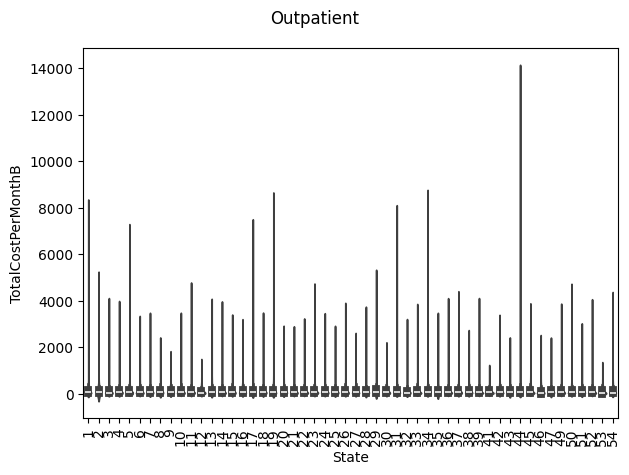

In [69]:
# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='TotalCostPerMonthB')

plt.tick_params(axis='x', rotation=90)
plt.suptitle('Outpatient')
plt.suptitle('Outpatient')
plt.tight_layout()
plt.show()

## Is there a difference between outpatient beneficiaries with full-year coverage and beneficiaries with partial-coverage? 

In [71]:
outpatient_full_coverage = outpatient_resource_usage[outpatient_resource_usage['YearRoundCoverage'] == 'Yes']

In [72]:
outpatient_partial_coverage = outpatient_resource_usage[outpatient_resource_usage['YearRoundCoverage'] == 'No']

In [73]:
print('Number of outpatient beneficiaries with full coverage:', len(outpatient_full_coverage))
print('Number of outpatient beneficiaries with partial coverage:', len(outpatient_partial_coverage))
print(f'Percent of outpatients with partial coverage: {round(len(outpatient_partial_coverage)/len(beneficiary) * 100, 2)}%')

Number of outpatient beneficiaries with full coverage: 136902
Number of outpatient beneficiaries with partial coverage: 1654
Percent of outpatients with partial coverage: 1.19%


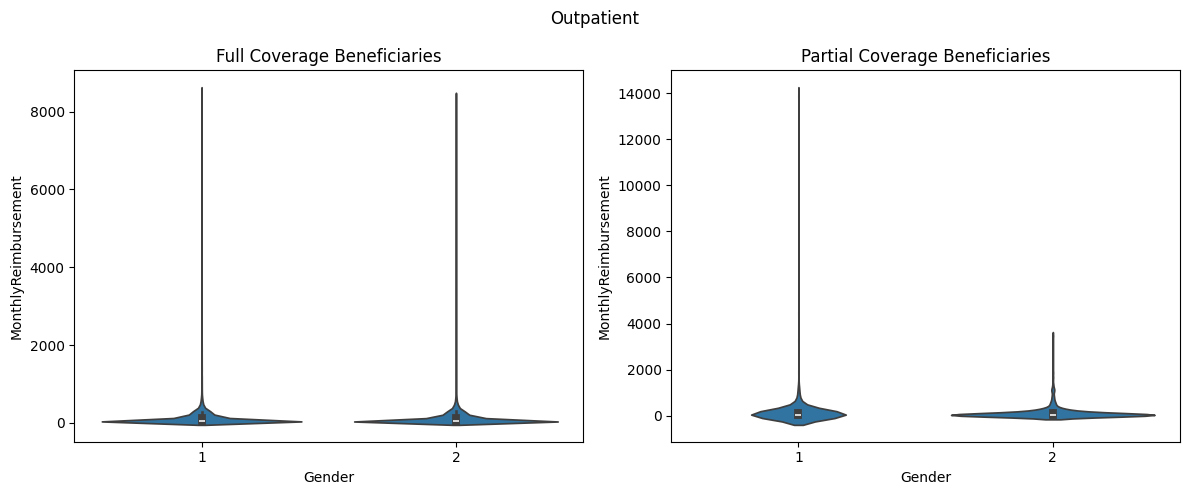

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# By Gender
sns.violinplot(data=outpatient_full_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')

sns.violinplot(data=outpatient_partial_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')

plt.suptitle('Monthly Reimbursement by Gender')
plt.suptitle('Outpatient')
plt.tight_layout() 
plt.show()

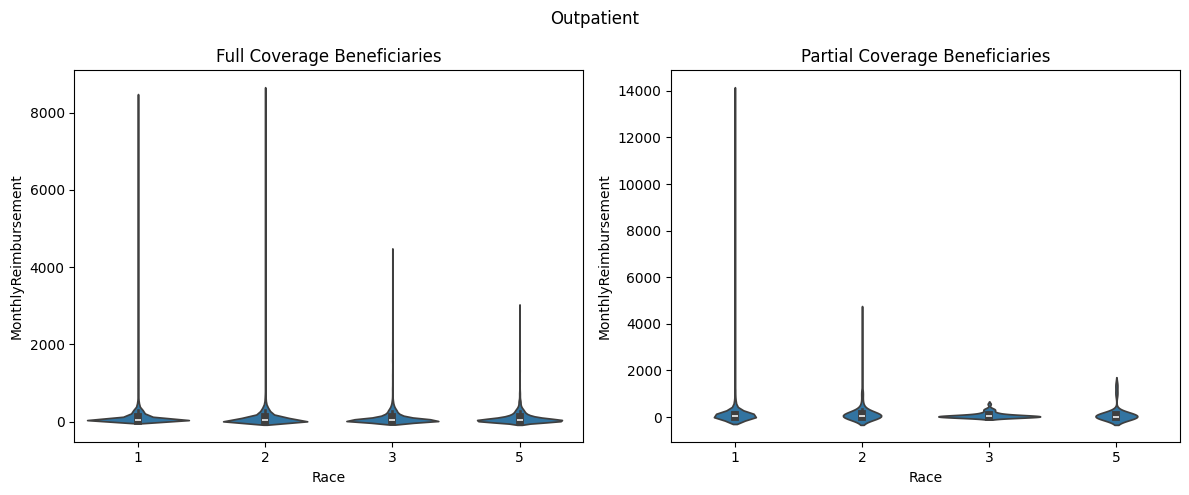

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=outpatient_full_coverage, x='Race', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')

sns.violinplot(data=outpatient_partial_coverage, x='Race', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')

plt.suptitle('Monthly Reimbursement by Race')
plt.suptitle('Outpatient')
plt.tight_layout() 
plt.show()

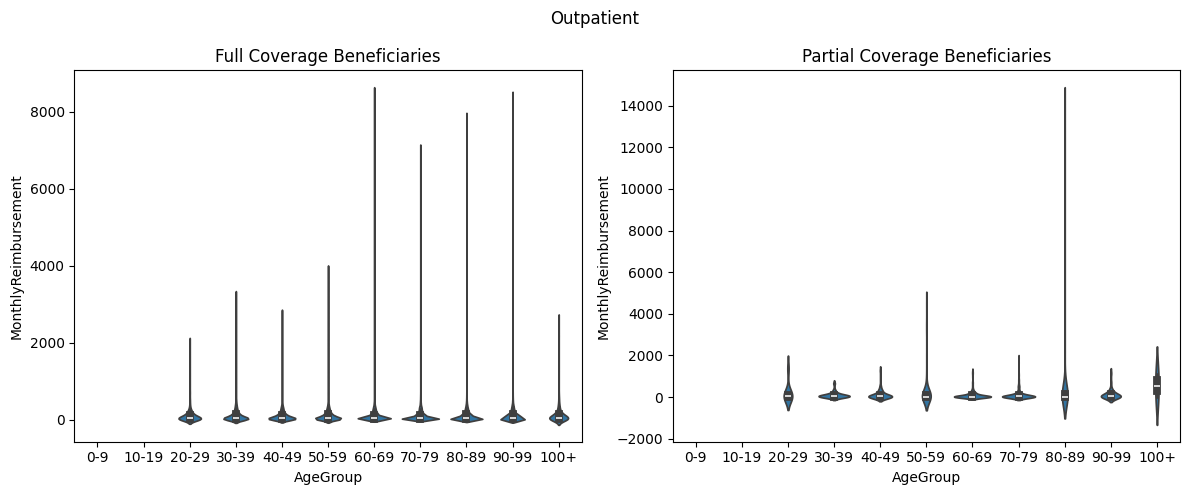

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=outpatient_full_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')

sns.violinplot(data=outpatient_partial_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')

plt.suptitle('Monthly Reimbursement by AgeGroup')
plt.suptitle('Outpatient')
plt.tight_layout() 
plt.show()

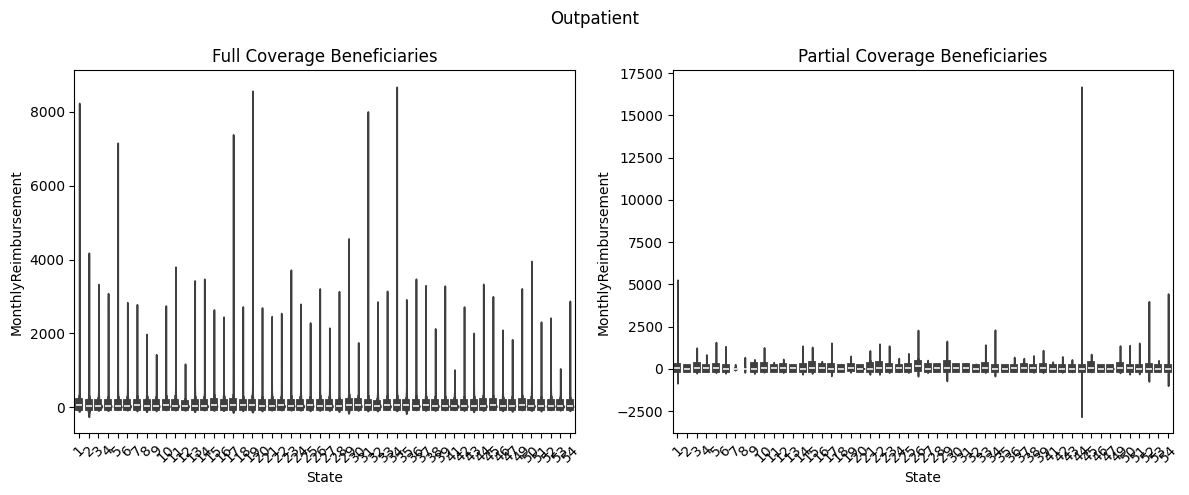

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=outpatient_full_coverage, x='State', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(data=outpatient_partial_coverage, x='State', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Monthly Reimbursement by State')
plt.suptitle('Outpatient')
plt.tight_layout() 
plt.show()

**Summary:**

1.2% of outpatient beneficiaries have partial coverage with the rest having full year-round coverage. 

**State 44: check values. Suspicious**

**Full-coverage Outpatients** who are Race 1 or 2, and age 60-69 are more resource intensive. States are also using resources at different levels that could be binned and investigated.

**Partial-coverage Outpatients** who are Gender 1, race 1, and age 80-89 are more resource intensive. Possibly outpatients from state 44 as well, but the result looks suspicious and should be investigated more closely. 

# In answering what types of patients would make more inpatient service claims, please provide your findings.

Repeat above analysis for inpatients

Categorize inpatients based on resource usage: look at 
- IPAnnualReimbursementAmt: total reimbursement for inpatient services during the year
- IPAnnualDeductibleAmt: total deductible paid by beneficiary during the year
- NoOfMonths_Part**A**Cov: number of months the beneficiary had **inpatient** coverage, for scaling

create columns with normalized monthly rates:
- MonthlyReimbursement = IPAnnualReimbursementAmt / NoOfMonths_PartACov
- MonthlyDeductible = IPAnnualDeductibleAmt / NoOfMonths_PartACov
- out-of-pocket-ratio (proportion of total costs paid by beneficiary) = IPAnnualDeductibleAmt / IPAnnualReimbursementAmt
- TotalCostPerMonthA (total healthcare spending per covered month) = (IPAnnualReimbursementAmt + IPAnnualDeductibleAmt) / NoOfMonths_PartACov

Consider patients separately based on (are they different):
- NoMonths_PartACov = 12 (full-year beneficiaries)
- NoMonths_PartACov < 12 (partial-year beneficiaries)


look at how this value relates to patient age, gender, race, state (county is too granular?)

In [80]:
inpatient_resource_usage = beneficiary_df.copy()

In [81]:
# create monthly reimbursement column
inpatient_resource_usage['MonthlyReimbursement'] = round(
    inpatient_resource_usage['IPAnnualReimbursementAmt'] / inpatient_resource_usage['NoOfMonths_PartACov']
, 2)

In [82]:
# create monthly deductible column
inpatient_resource_usage['MonthlyDeductible'] = round(
    inpatient_resource_usage['IPAnnualDeductibleAmt'] / inpatient_resource_usage['NoOfMonths_PartACov']
, 2)

In [83]:
# create out-of-pocket ratio column
inpatient_resource_usage['OOPRatio'] = round(
    inpatient_resource_usage['IPAnnualDeductibleAmt'] / inpatient_resource_usage['IPAnnualReimbursementAmt']
, 2)

In [84]:
# create total cost per month column, describing cost on behalf of insurer and beneficiary
inpatient_resource_usage['TotalCostPerMonthA'] = round(
    (inpatient_resource_usage['IPAnnualReimbursementAmt'] + inpatient_resource_usage['IPAnnualDeductibleAmt']) / inpatient_resource_usage['NoOfMonths_PartACov']
, 2)

In [85]:
# create flag for beneficiaries covered year-round
# also: df['YearRoundCoverage'] = np.where(df['NoOfMonths_PartACov'] == 12, 'Yes', 'No')
inpatient_resource_usage['YearRoundCoverage'] = inpatient_resource_usage['NoOfMonths_PartACov'].apply(lambda x: 'Yes' if x == 12 else 'No')

In [86]:
# In order to visualize more easily, bin ages by decade
inpatient_resource_usage['AgeGroup'] = pd.cut(
    inpatient_resource_usage['relative_age'], 
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 
    labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+'],
    right=False  # makes bins like [0, 10) instead of (0, 10]
)

In [87]:
inpatient_resource_usage.head(2)

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   

   OPAnnualDeductibleAmt  chronic_cond_1_counts  last_date  relative_age  \
0                     70                      7 2009-12-31            66   
1                     50                      0 2009-12-31            73   

   MonthlyReimbursement MonthlyDeductible  OOPRatio  TotalCostPerMonthA  \
0                3000.0             267.0      0.09              3267.0   
1                   0.0               0.0       NaN                 0.0   

   YearRoundCoverage  AgeGroup  
0                Yes     60-69  
1                Yes     70-79  

[2 rows x 23 columns]

## visualize based on gender, age, race, state of residence

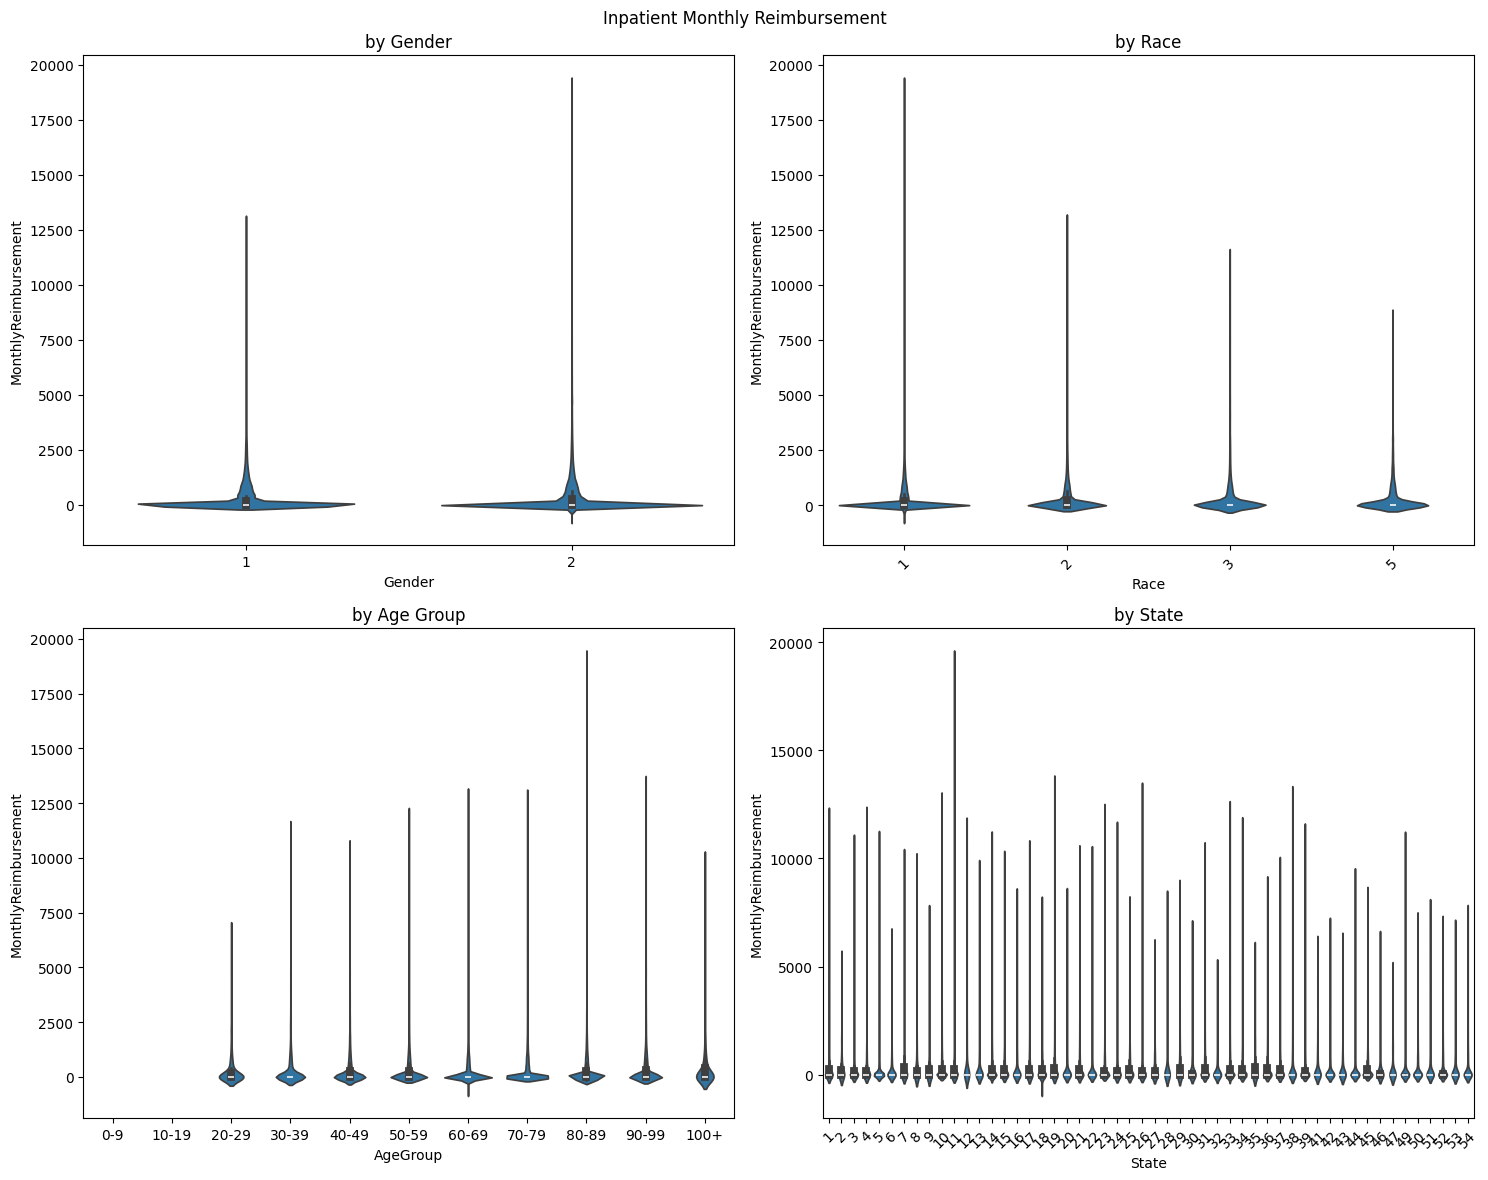

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_resource_usage, x='Gender', y='MonthlyReimbursement', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_resource_usage, x='Race', y='MonthlyReimbursement', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_resource_usage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='MonthlyReimbursement', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Inpatient Monthly Reimbursement')
plt.tight_layout()
plt.show()

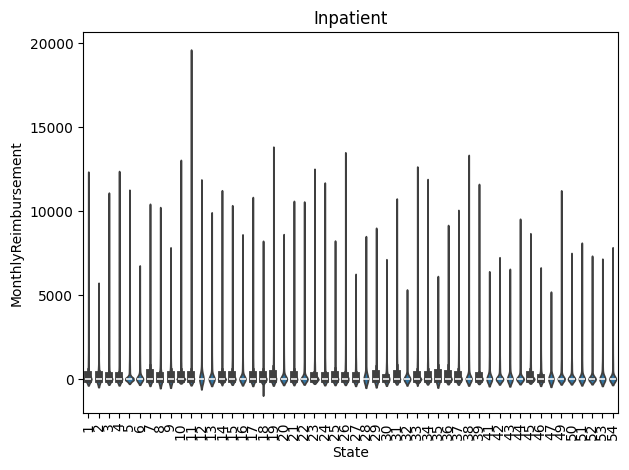

In [90]:
# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='MonthlyReimbursement')

plt.tick_params(axis='x', rotation=90)
plt.title('Inpatient')
plt.tight_layout()
plt.show()

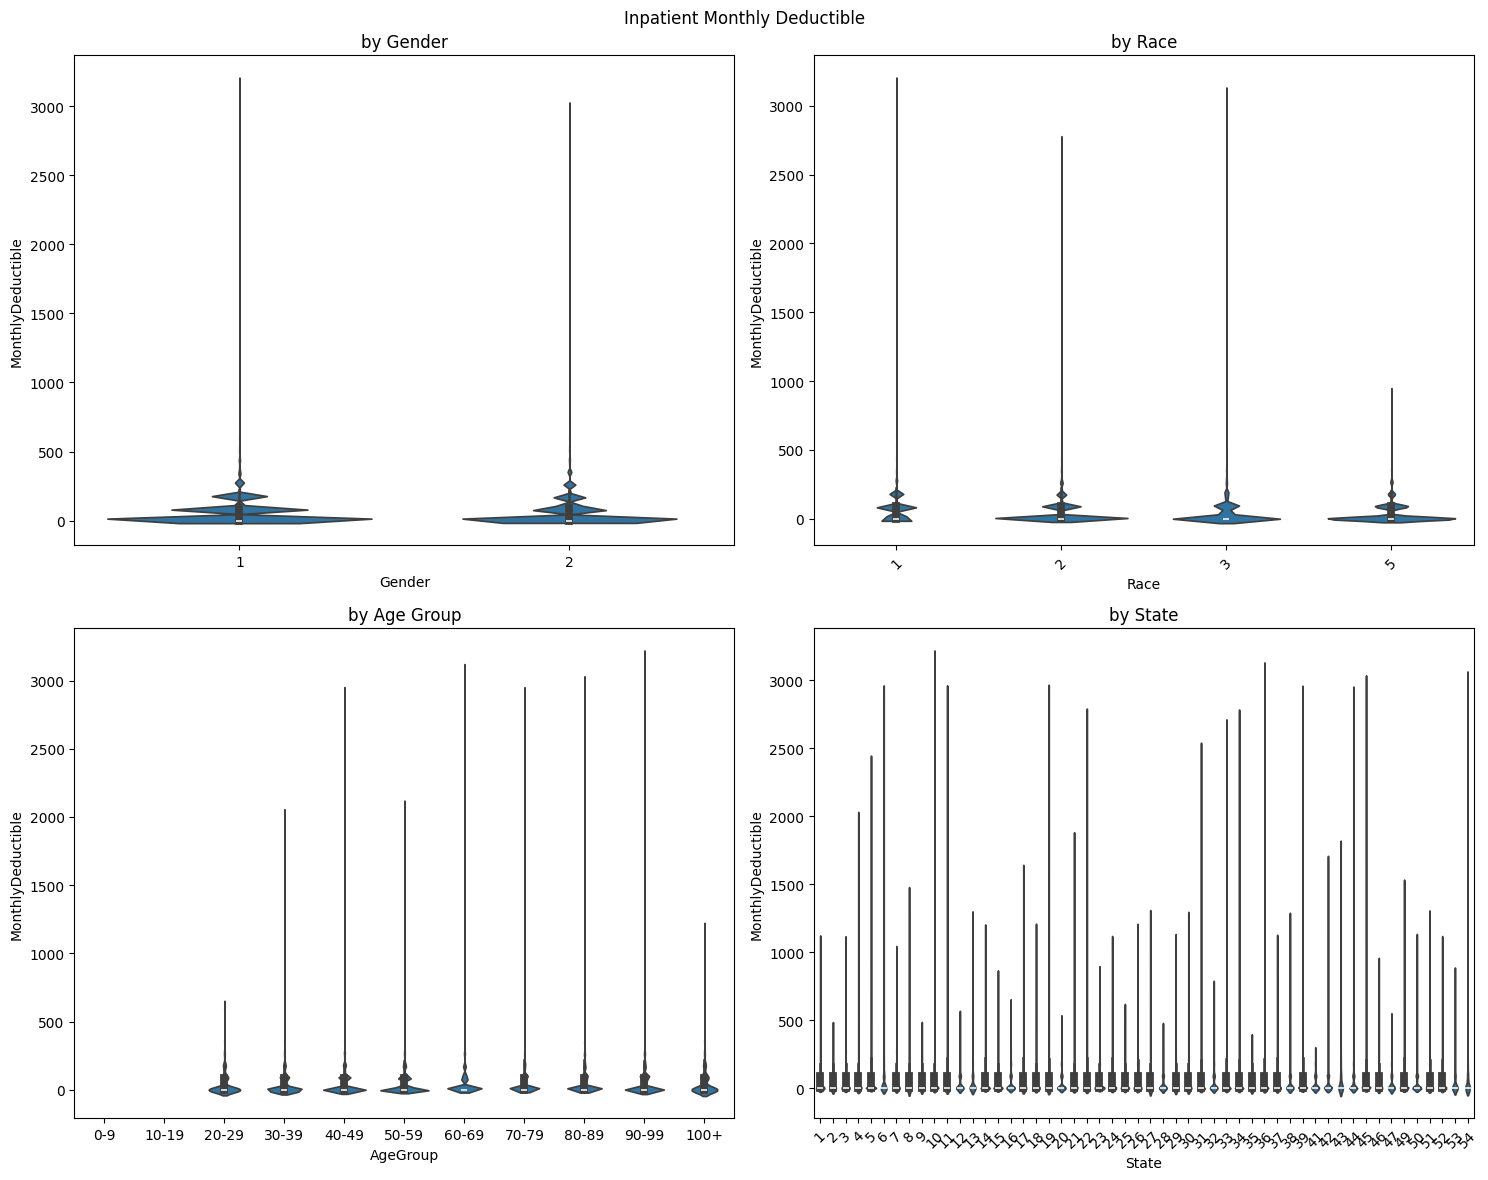

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_resource_usage, x='Gender', y='MonthlyDeductible', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_resource_usage, x='Race', y='MonthlyDeductible', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_resource_usage, x='AgeGroup', y='MonthlyDeductible', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='MonthlyDeductible', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Inpatient Monthly Deductible')
plt.tight_layout()
plt.show()

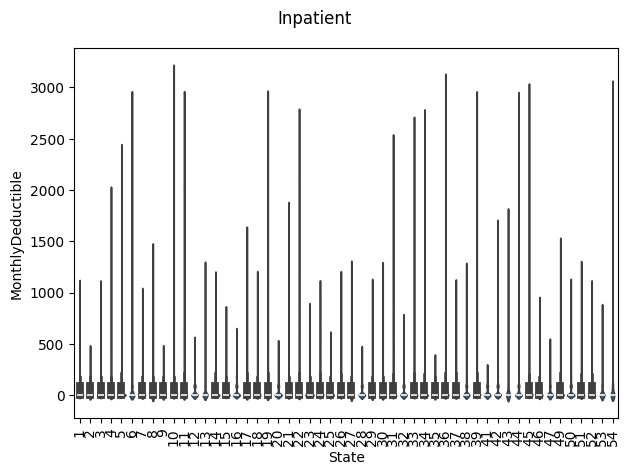

In [92]:
# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='MonthlyDeductible')

plt.tick_params(axis='x', rotation=90)
plt.suptitle('Inpatient')
plt.tight_layout()
plt.show()

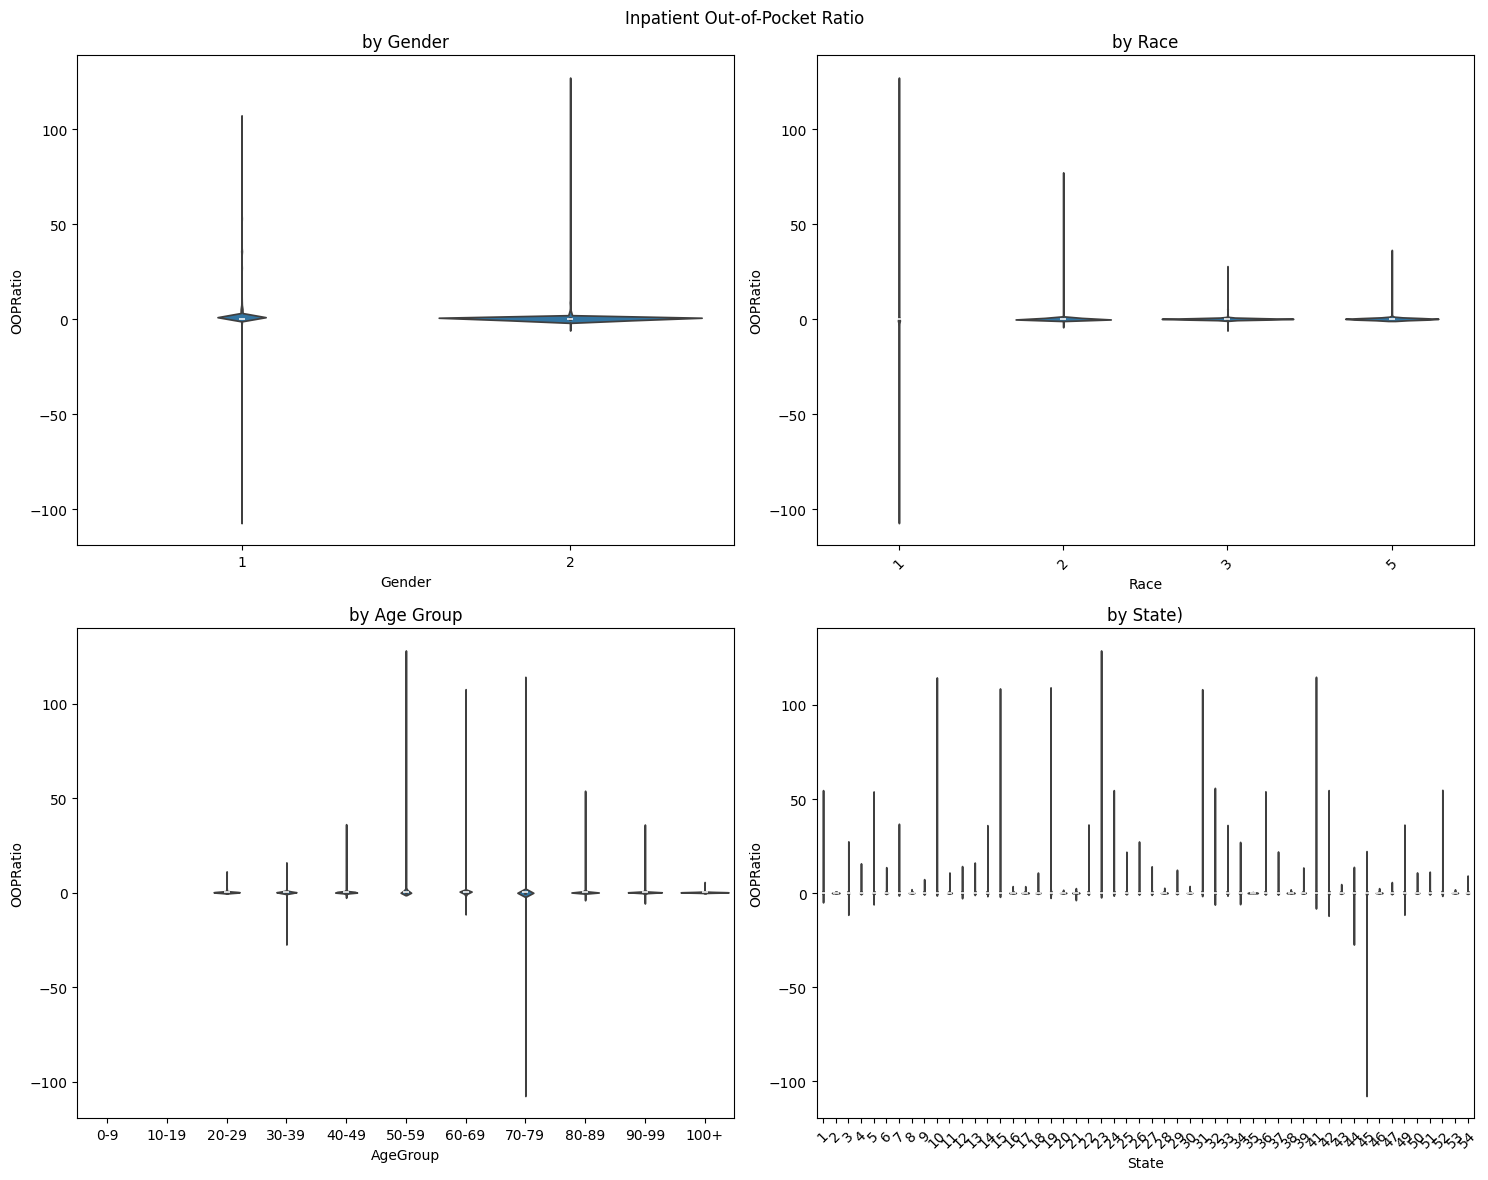

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_resource_usage, x='Gender', y='OOPRatio', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_resource_usage, x='Race', y='OOPRatio', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_resource_usage, x='AgeGroup', y='OOPRatio', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='OOPRatio', ax=axes[1, 1])
axes[1, 1].set_title('by State)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Inpatient Out-of-Pocket Ratio')
plt.tight_layout()
plt.show()

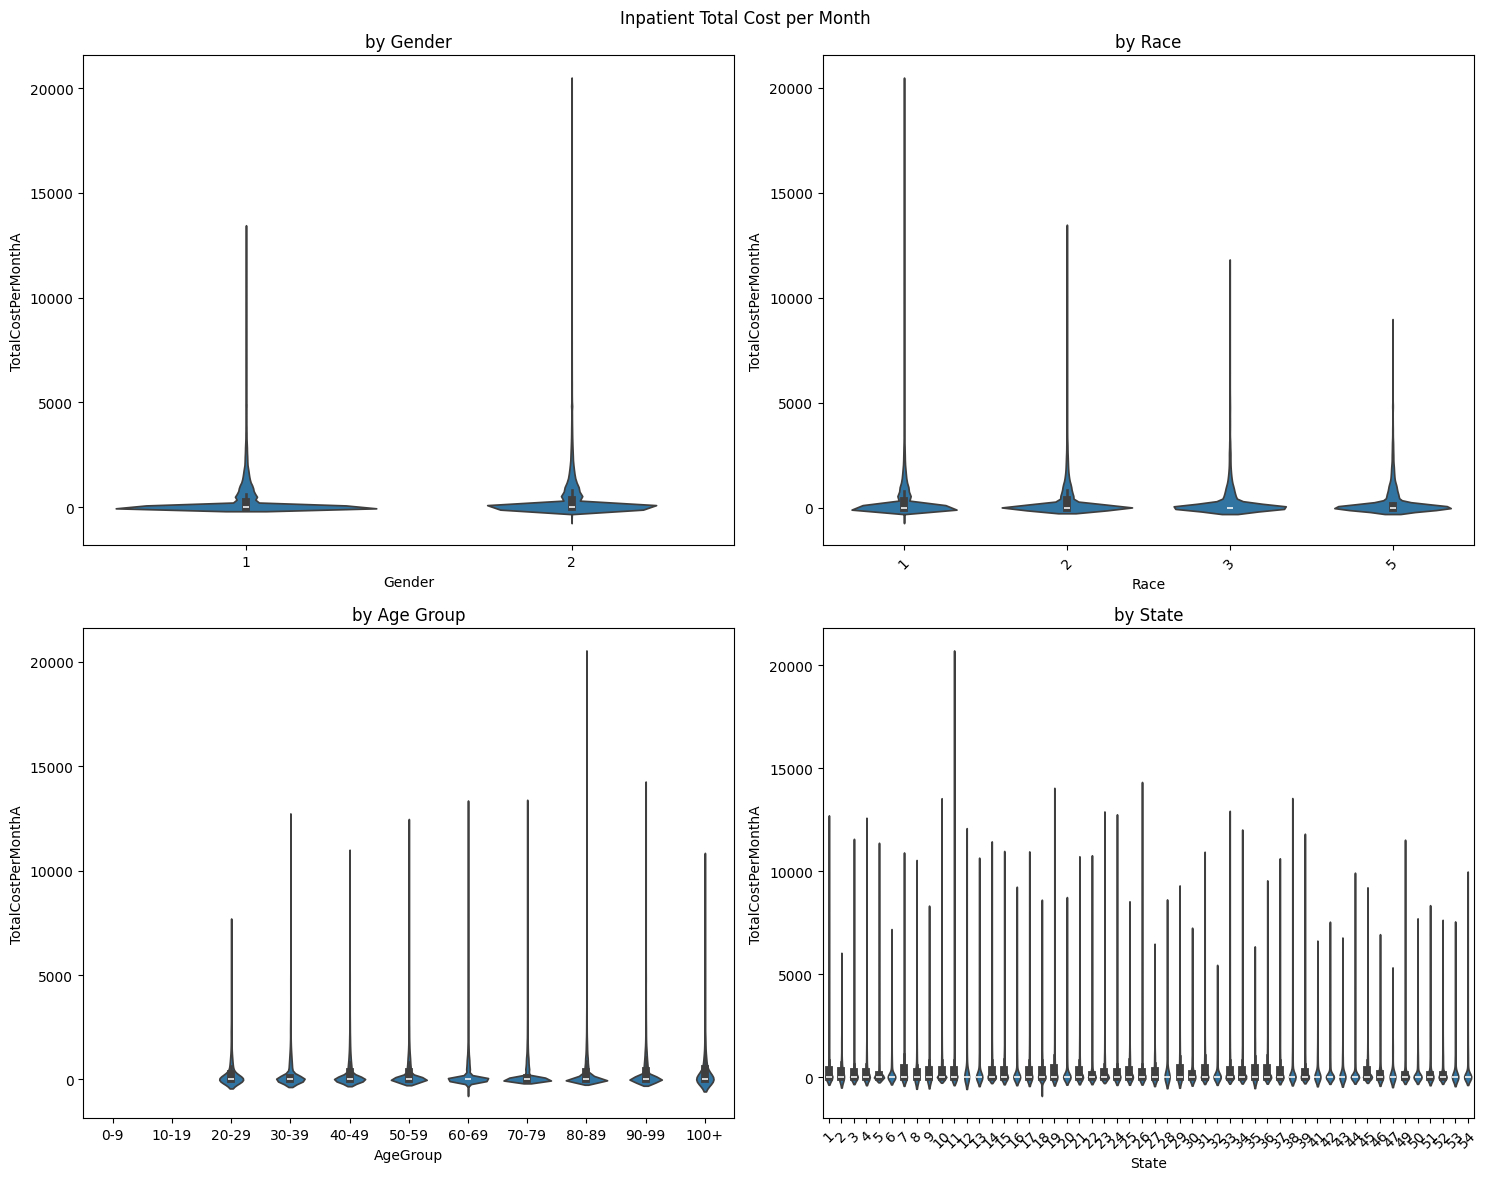

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_resource_usage, x='Gender', y='TotalCostPerMonthA', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_resource_usage, x='Race', y='TotalCostPerMonthA', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_resource_usage, x='AgeGroup', y='TotalCostPerMonthA', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='TotalCostPerMonthA', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Inpatient Total Cost per Month')
plt.tight_layout()
plt.show()

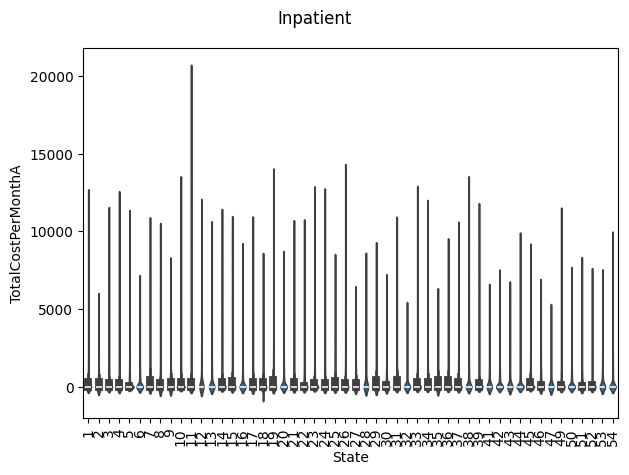

In [95]:
# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='TotalCostPerMonthA')

plt.tick_params(axis='x', rotation=90)
plt.suptitle('Inpatient')
plt.tight_layout()
plt.show()

## Is there a difference between inpatient beneficiaries with full-year coverage and beneficiaries with partial-coverage? 

In [97]:
inpatient_full_coverage = inpatient_resource_usage[inpatient_resource_usage['YearRoundCoverage'] == 'Yes']

In [98]:
inpatient_partial_coverage = inpatient_resource_usage[inpatient_resource_usage['YearRoundCoverage'] == 'No']

In [99]:
1167/(137389+1167)

0.008422587257137909

In [100]:
print('Number of inpatient beneficiaries with full coverage:', len(inpatient_full_coverage))
print('Number of inpatient beneficiaries with partial coverage:', len(inpatient_partial_coverage))
print(f'Percent of inpatients with partial coverage: {round(len(inpatient_partial_coverage)/len(beneficiary) * 100, 2)}%')

Number of inpatient beneficiaries with full coverage: 137389
Number of inpatient beneficiaries with partial coverage: 1167
Percent of inpatients with partial coverage: 0.84%


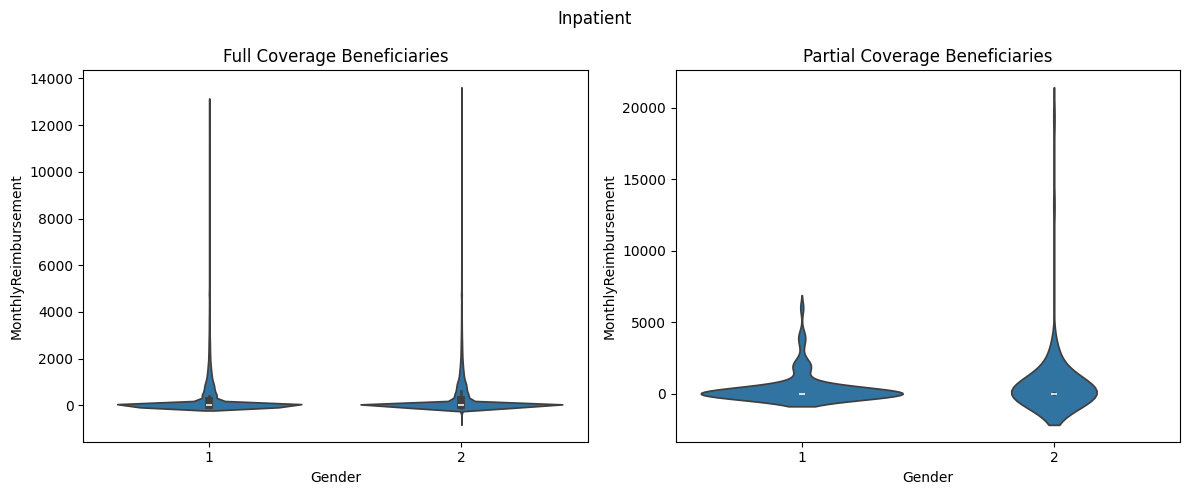

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# By Gender
sns.violinplot(data=inpatient_full_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')

sns.violinplot(data=inpatient_partial_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')

plt.suptitle('Monthly Reimbursement by Gender')
plt.suptitle('Inpatient')
plt.tight_layout() 
plt.show()

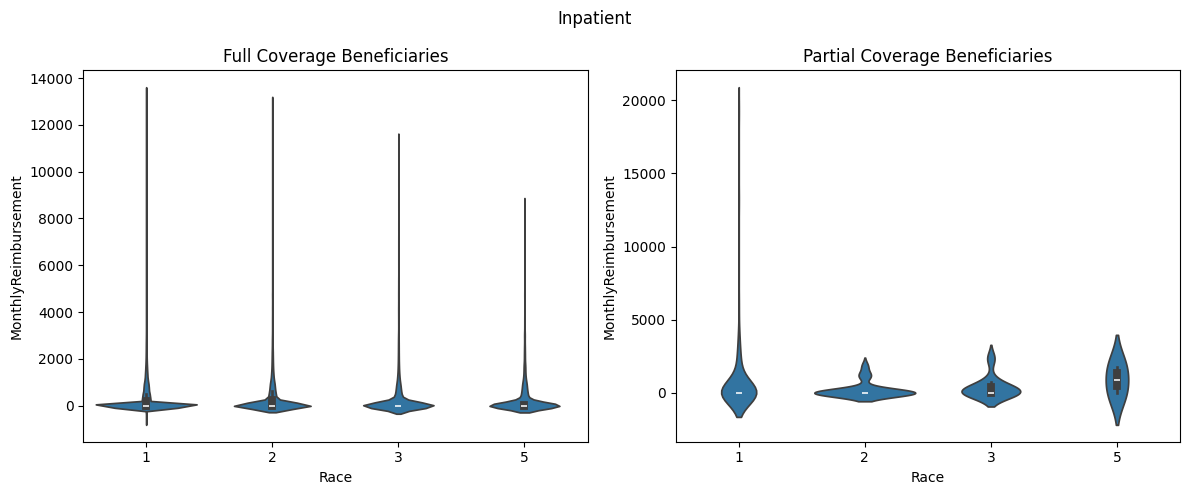

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=inpatient_full_coverage, x='Race', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')

sns.violinplot(data=inpatient_partial_coverage, x='Race', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')

plt.suptitle('Monthly Reimbursement by Race')
plt.suptitle('Inpatient')
plt.tight_layout() 
plt.show()

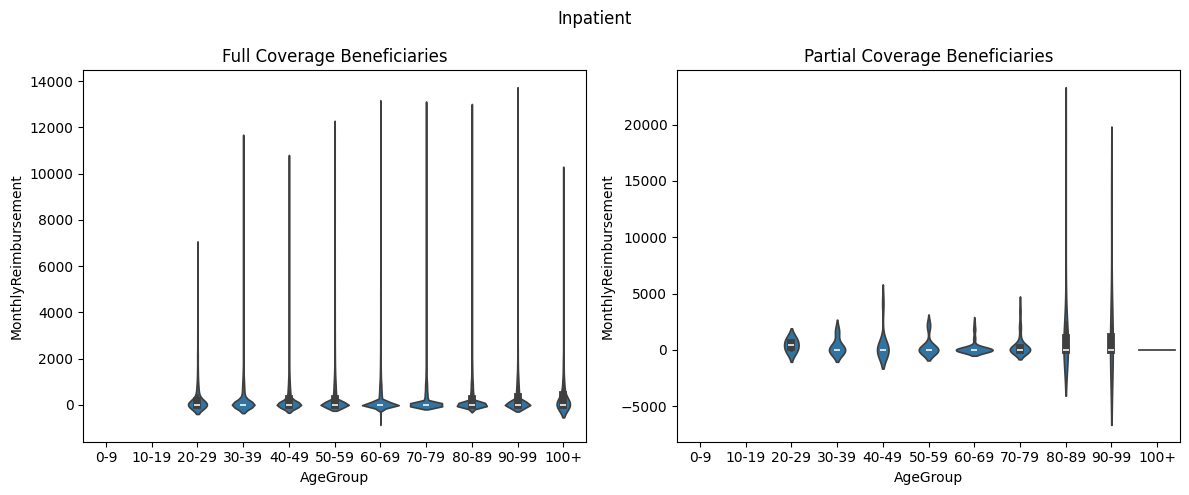

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=inpatient_full_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')

sns.violinplot(data=inpatient_partial_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')

plt.suptitle('Monthly Reimbursement by AgeGroup')
plt.suptitle('Inpatient')
plt.tight_layout() 
plt.show()

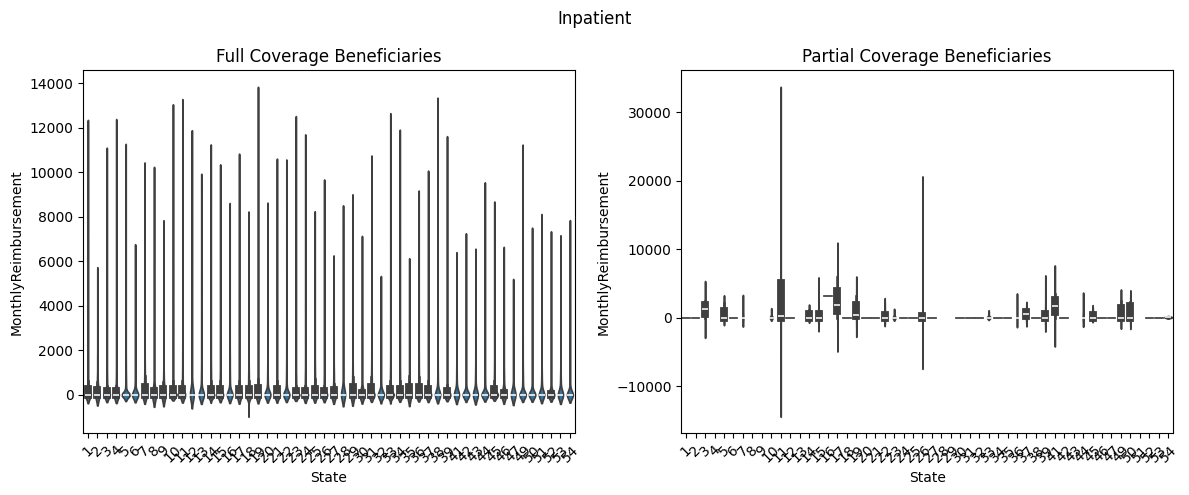

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(data=inpatient_full_coverage, x='State', y='MonthlyReimbursement', ax=axes[0])
axes[0].set_title('Full Coverage Beneficiaries')
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(data=inpatient_partial_coverage, x='State', y='MonthlyReimbursement', ax=axes[1])
axes[1].set_title('Partial Coverage Beneficiaries')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Monthly Reimbursement by State')
plt.suptitle('Inpatient')
plt.tight_layout() 
plt.show()

**Summary:**

0.84% of inpatient beneficiaries have partial coverage with the rest having full year-round coverage. 

Considering these as distinct groups of beneficiaries: 
- **Full coverage beneficiaries**:    			
    - gender: similar				
    - race: extremes in all races
    - agegroup: extremes in all age groups, less so in 20-29
- state: all over the place
  

- **Partial coverage beneficiaries**:
    - gender 2: more extremes
    - race 1: more extremes
    - agegroup: 80-99 more extremes
    - state: state 11 and 26? very extreme. Might want to check this data. Lots of differences by state

**Full-coverage Inpatients** who are 20-29 may be a little less resource intensive. States are also using resources at different levels that could be binned and investigated.

**Partial-coverage Inpatients** who are Gender 2, race 1, and age 80-99 are more resource intensive. Possibly inpatients from state 11 and 26 as well, but this should be investigated more closely. 

**The gender using the most resources for partial coverage is noticeably different depending on whether services are inpatient or outpatient.** 

# From the perspective of the insurance company, the reimbursed amounts are their coverage on the claims. Please analyze the patterns of the total reimbursed amounts (or average reimbursed amounts/visit) vs different types of patients.

The data is for one year, so AnnualReimbursementAmt and total_claims is for a single year.

Create a column that is the ReimbursementPerVisit = AnnualReimbursementAmt / total_claims

Analyze for patients depending on age, gender, race, state of residence

In [107]:
# add total_claims from inpatient_df to inpatient_resource_usage
inpatient_resource_usage['inpatient_claims'] = inpatient_df['total_claims']
inpatient_resource_usage.head()

# add total_claims from outpatient_df to outpatient_resource_usage
outpatient_resource_usage['outpatient_claims'] = outpatient_df['total_claims']
outpatient_resource_usage.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   OPAnnualDeductibleAmt  chronic_cond_1_counts  MonthlyReimbursement  \
0                     70                      7                  5.00   
1                     50                      0                  2.50   
2                     40                      2                  7.50   
3                    760                      6                150.83   
4                   1200                      2                149.17   

   MonthlyDeductible  OOPRatio  TotalCostPerMonthB  YearRoundCoverage  \
0               5.83      1.17               10.83                Yes   
1               4.17      1.67                6.67                Yes   
2               3.33      0.44               10.83                Yes   
3              63.33      0.42              214.17                Yes   
4             100.00      0.67              249.17                Yes   

   relative_age  AgeGroup outpatient_claims  
0            66     60-69                 1  
1            73     70-79                 2  
2            73     70-79                 2  
3            87     80-89                12  
4            74     70-79                12  

[5 rows x 23 columns]

In [108]:
# double check 
outpatient_df['total_claims']

0          1
1          2
2          2
3         12
4         12
          ..
517732    13
517733    13
517734    13
517735    13
517736    13
Name: total_claims, Length: 517737, dtype: int64

In [109]:
# create reimbursment per visit column in each _df
inpatient_resource_usage['ReimbursementPerVisit'] = round(
    inpatient_resource_usage['IPAnnualReimbursementAmt'] / inpatient_resource_usage['inpatient_claims']
, 2)
outpatient_resource_usage['ReimbursementPerVisit'] = round(
    outpatient_resource_usage['OPAnnualReimbursementAmt'] / outpatient_resource_usage['outpatient_claims']
, 2)

In [110]:
outpatient_resource_usage.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   chronic_cond_1_counts  MonthlyReimbursement  MonthlyDeductible  OOPRatio  \
0                      7                  5.00               5.83      1.17   
1                      0                  2.50               4.17      1.67   
2                      2                  7.50               3.33      0.44   
3                      6                150.83              63.33      0.42   
4                      2                149.17             100.00      0.67   

   TotalCostPerMonthB  YearRoundCoverage  relative_age  AgeGroup  \
0               10.83                Yes            66     60-69   
1                6.67                Yes            73     70-79   
2               10.83                Yes            73     70-79   
3              214.17                Yes            87     80-89   
4              249.17                Yes            74     70-79   

   outpatient_claims ReimbursementPerVisit  
0                  1                 60.00  
1                  2                 15.00  
2                  2                 45.00  
3                 12                150.83  
4                 12                149.17  

[5 rows x 24 columns]

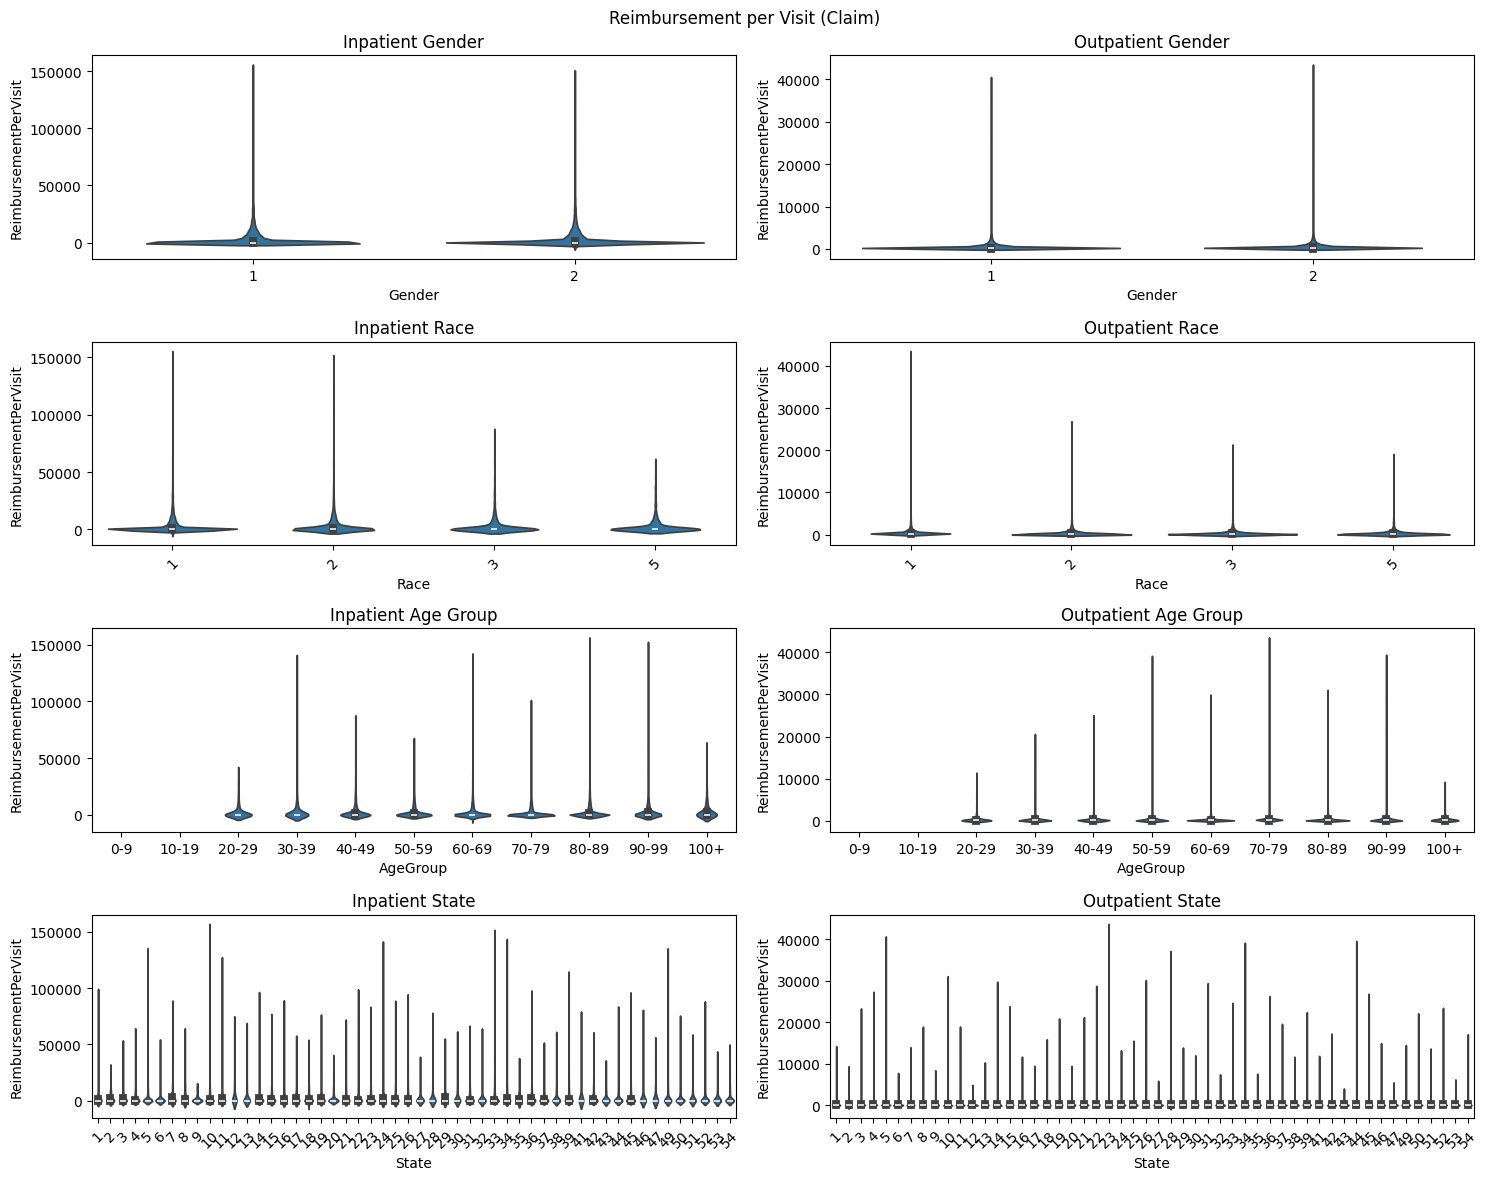

In [111]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_resource_usage, x='Gender', y='ReimbursementPerVisit', ax=axes[0, 0])
axes[0, 0].set_title('Inpatient Gender')
sns.violinplot(data=outpatient_resource_usage, x='Gender', y='ReimbursementPerVisit', ax=axes[0, 1])
axes[0, 1].set_title('Outpatient Gender')

# By Race
sns.violinplot(data=inpatient_resource_usage, x='Race', y='ReimbursementPerVisit', ax=axes[1, 0])
axes[1, 0].set_title('Inpatient Race')
axes[1, 0].tick_params(axis='x', rotation=45)
sns.violinplot(data=outpatient_resource_usage, x='Race', y='ReimbursementPerVisit', ax=axes[1, 1])
axes[1, 1].set_title('Outpatient Race')
axes[1, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_resource_usage, x='AgeGroup', y='ReimbursementPerVisit', ax=axes[2, 0])
axes[2, 0].set_title('Inpatient Age Group')
sns.violinplot(data=outpatient_resource_usage, x='AgeGroup', y='ReimbursementPerVisit', ax=axes[2, 1])
axes[2, 1].set_title('Outpatient Age Group')

# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='ReimbursementPerVisit', ax=axes[3, 0])
axes[3, 0].set_title('Inpatient State')
axes[3, 0].tick_params(axis='x', rotation=45)
sns.violinplot(data=outpatient_resource_usage, x='State', y='ReimbursementPerVisit', ax=axes[3, 1])
axes[3, 1].set_title('Outpatient State')
axes[3, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Reimbursement per Visit (Claim)')
plt.tight_layout()
plt.show()

# From the perspective of the providers, the sum of reimbursed amounts and deductibles are flowing to the providers. Based on this, analyze which types of patients contribute more to the providers in terms of the aggregate charges or the average charge per visit.

?

TotalCostPerMonth = (reimbursement + deductible) / months of coverage

Scale by number of visits 
( (reimbursement + deductible) / (number of visits or claims) ) / months of coverage

= TotalCostPerMonth / patient_claims

In [113]:
# create a column for average total monthly cost per visit
inpatient_resource_usage['TotalMonthlyCostPerVisitA'] = round(
    inpatient_resource_usage['TotalCostPerMonthA'] / inpatient_resource_usage['inpatient_claims']
, 2)
outpatient_resource_usage['TotalMonthlyCostPerVisitB'] = round(
    outpatient_resource_usage['TotalCostPerMonthB'] / outpatient_resource_usage['outpatient_claims']
, 2)

In [114]:
outpatient_resource_usage.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   MonthlyReimbursement  MonthlyDeductible  OOPRatio  TotalCostPerMonthB  \
0                  5.00               5.83      1.17               10.83   
1                  2.50               4.17      1.67                6.67   
2                  7.50               3.33      0.44               10.83   
3                150.83              63.33      0.42              214.17   
4                149.17             100.00      0.67              249.17   

   YearRoundCoverage  relative_age  AgeGroup  outpatient_claims  \
0                Yes            66     60-69                  1   
1                Yes            73     70-79                  2   
2                Yes            73     70-79                  2   
3                Yes            87     80-89                 12   
4                Yes            74     70-79                 12   

   ReimbursementPerVisit TotalMonthlyCostPerVisitB  
0                  60.00                     10.83  
1                  15.00                      3.34  
2                  45.00                      5.42  
3                 150.83                     17.85  
4                 149.17                     20.76  

[5 rows x 25 columns]

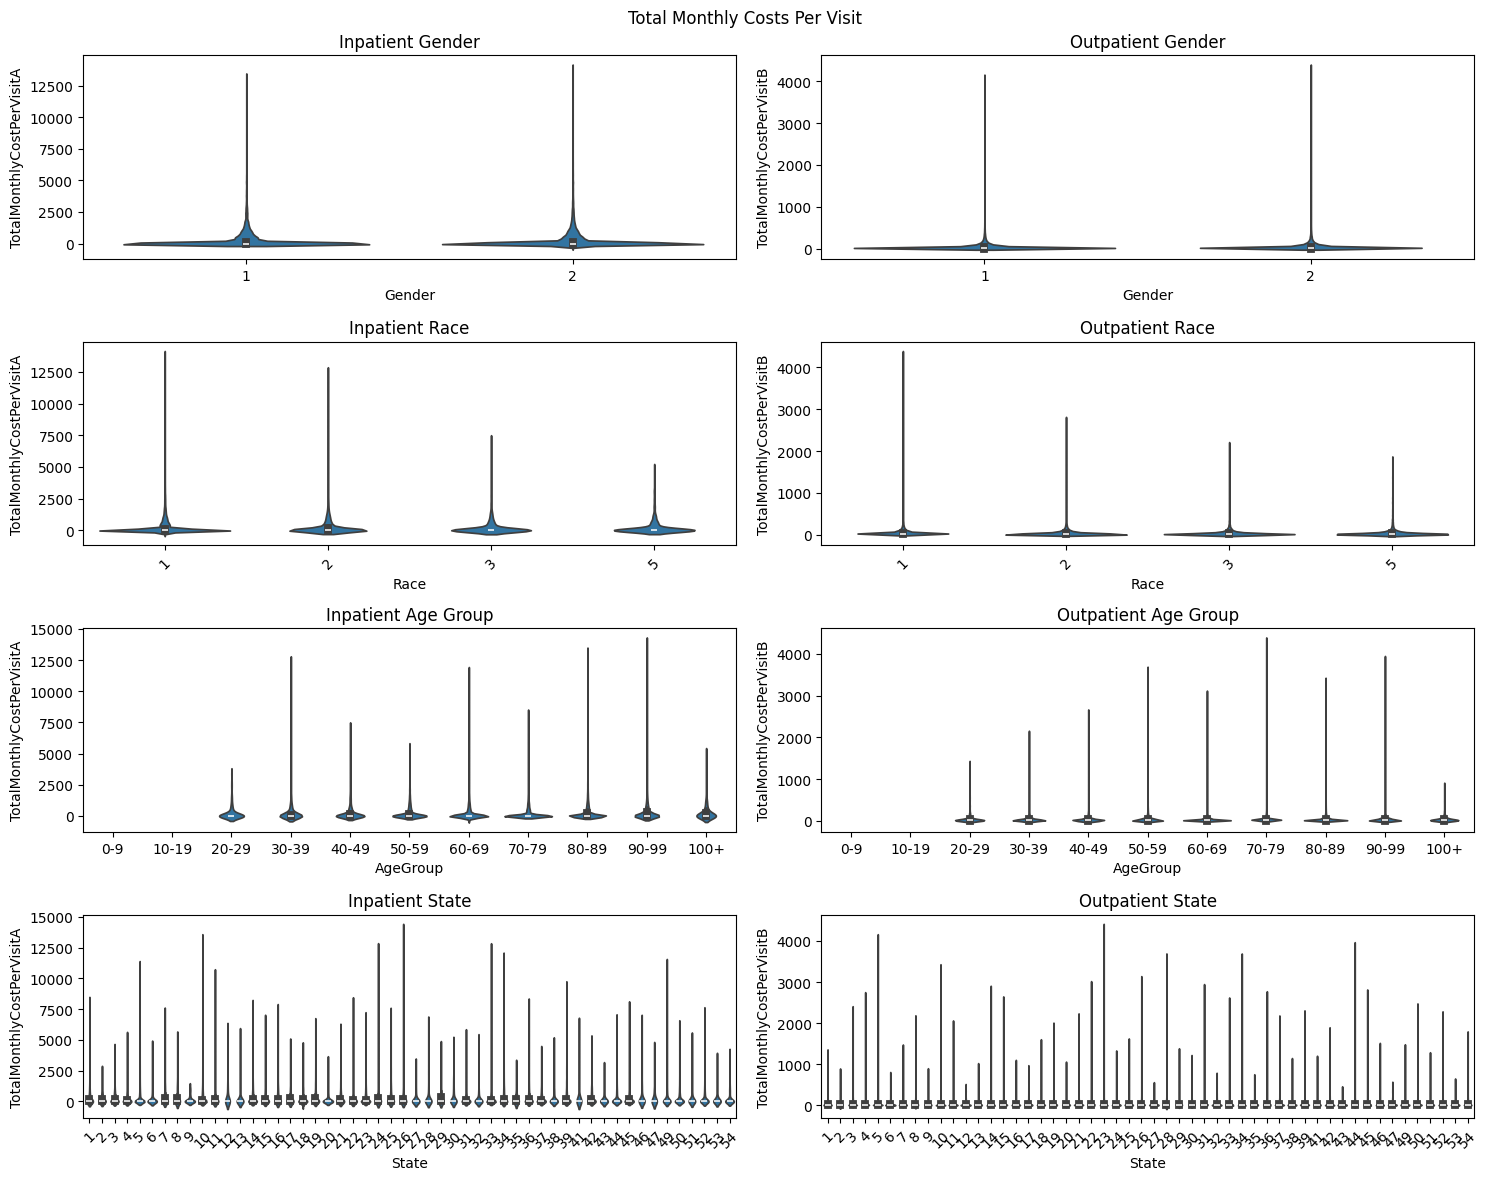

In [115]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_resource_usage, x='Gender', y='TotalMonthlyCostPerVisitA', ax=axes[0, 0])
axes[0, 0].set_title('Inpatient Gender')
sns.violinplot(data=outpatient_resource_usage, x='Gender', y='TotalMonthlyCostPerVisitB', ax=axes[0, 1])
axes[0, 1].set_title('Outpatient Gender')

# By Race
sns.violinplot(data=inpatient_resource_usage, x='Race', y='TotalMonthlyCostPerVisitA', ax=axes[1, 0])
axes[1, 0].set_title('Inpatient Race')
axes[1, 0].tick_params(axis='x', rotation=45)
sns.violinplot(data=outpatient_resource_usage, x='Race', y='TotalMonthlyCostPerVisitB', ax=axes[1, 1])
axes[1, 1].set_title('Outpatient Race')
axes[1, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_resource_usage, x='AgeGroup', y='TotalMonthlyCostPerVisitA', ax=axes[2, 0])
axes[2, 0].set_title('Inpatient Age Group')
sns.violinplot(data=outpatient_resource_usage, x='AgeGroup', y='TotalMonthlyCostPerVisitB', ax=axes[2, 1])
axes[2, 1].set_title('Outpatient Age Group')

# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='TotalMonthlyCostPerVisitA', ax=axes[3, 0])
axes[3, 0].set_title('Inpatient State')
axes[3, 0].tick_params(axis='x', rotation=45)
sns.violinplot(data=outpatient_resource_usage, x='State', y='TotalMonthlyCostPerVisitB', ax=axes[3, 1])
axes[3, 1].set_title('Outpatient State')
axes[3, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Total Monthly Costs Per Visit')
plt.tight_layout()
plt.show()

# Extra 

In [244]:
print('earliest claim in inpatient:', inpatient['ClaimStartDt'].min())
print('oldest claim in inpatient:', inpatient['ClaimStartDt'].max())

earliest claim in inpatient: 2008-11-27
oldest claim in inpatient: 2009-12-31


In [246]:
print('earliest claim in outpatient:', outpatient['ClaimStartDt'].min())
print('oldest claim in outpatient:', outpatient['ClaimStartDt'].max())

earliest claim in outpatient: 2008-12-12
oldest claim in outpatient: 2009-12-31


No more data was collected after 2009-12-31. Assume this as the date from which to calculate the absolute age of the beneficiary.

In [251]:
# add a 16th column with last date data was collected
beneficiary_df['last_date'] = pd.to_datetime('2009-12-31')
beneficiary_df.head(2)

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  IPAnnualReimbursementAmt  \
0     230                   12                   12                     36000   
1     280                   12                   12                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                   3204                        60                     70   
1                      0                        30                     50   

   chronic_cond_1_counts  last_date  relative_age  
0                      7 2009-12-31            66  
1                      0 2009-12-31            73

In [253]:
# change DOB to datetime 
beneficiary_df['DOB'] = pd.to_datetime(beneficiary_df['DOB'])

In [255]:
beneficiary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   BeneID                    138556 non-null  object        
 1   DOB                       138556 non-null  datetime64[ns]
 2   DOD                       1421 non-null    object        
 3   Gender                    138556 non-null  int64         
 4   Race                      138556 non-null  int64         
 5   RenalDiseaseIndicator     138556 non-null  object        
 6   State                     138556 non-null  int64         
 7   County                    138556 non-null  int64         
 8   NoOfMonths_PartACov       138556 non-null  int64         
 9   NoOfMonths_PartBCov       138556 non-null  int64         
 10  IPAnnualReimbursementAmt  138556 non-null  int64         
 11  IPAnnualDeductibleAmt     138556 non-null  int64         
 12  OP

In [257]:
# add a column for age of benficiary relative to this date
beneficiary_df['relative_age'] =  ((
    beneficiary_df['last_date'] - beneficiary_df['DOB']
).dt.days / 365.25).astype(int)

In [259]:
beneficiary_df.head(2)

BeneID        DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01  NaN       1     1                     0     39   
1  BENE11002 1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  IPAnnualReimbursementAmt  \
0     230                   12                   12                     36000   
1     280                   12                   12                         0   

   IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
0                   3204                        60                     70   
1                      0                        30                     50   

   chronic_cond_1_counts  last_date  relative_age  
0                      7 2009-12-31            66  
1                      0 2009-12-31            73

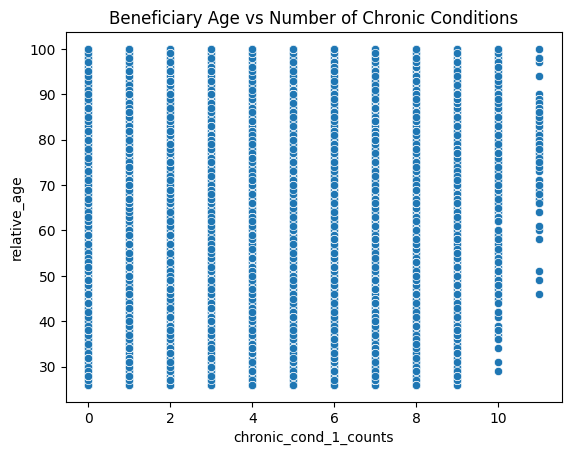

In [261]:
# look at relationship between age and chronic condition counts
sns.scatterplot(x='chronic_cond_1_counts',
               y='relative_age',
               data=beneficiary_df)
plt.title('Beneficiary Age vs Number of Chronic Conditions')
plt.show()

## another view

# Monthly Reimbursement

**OUTPATIENT**

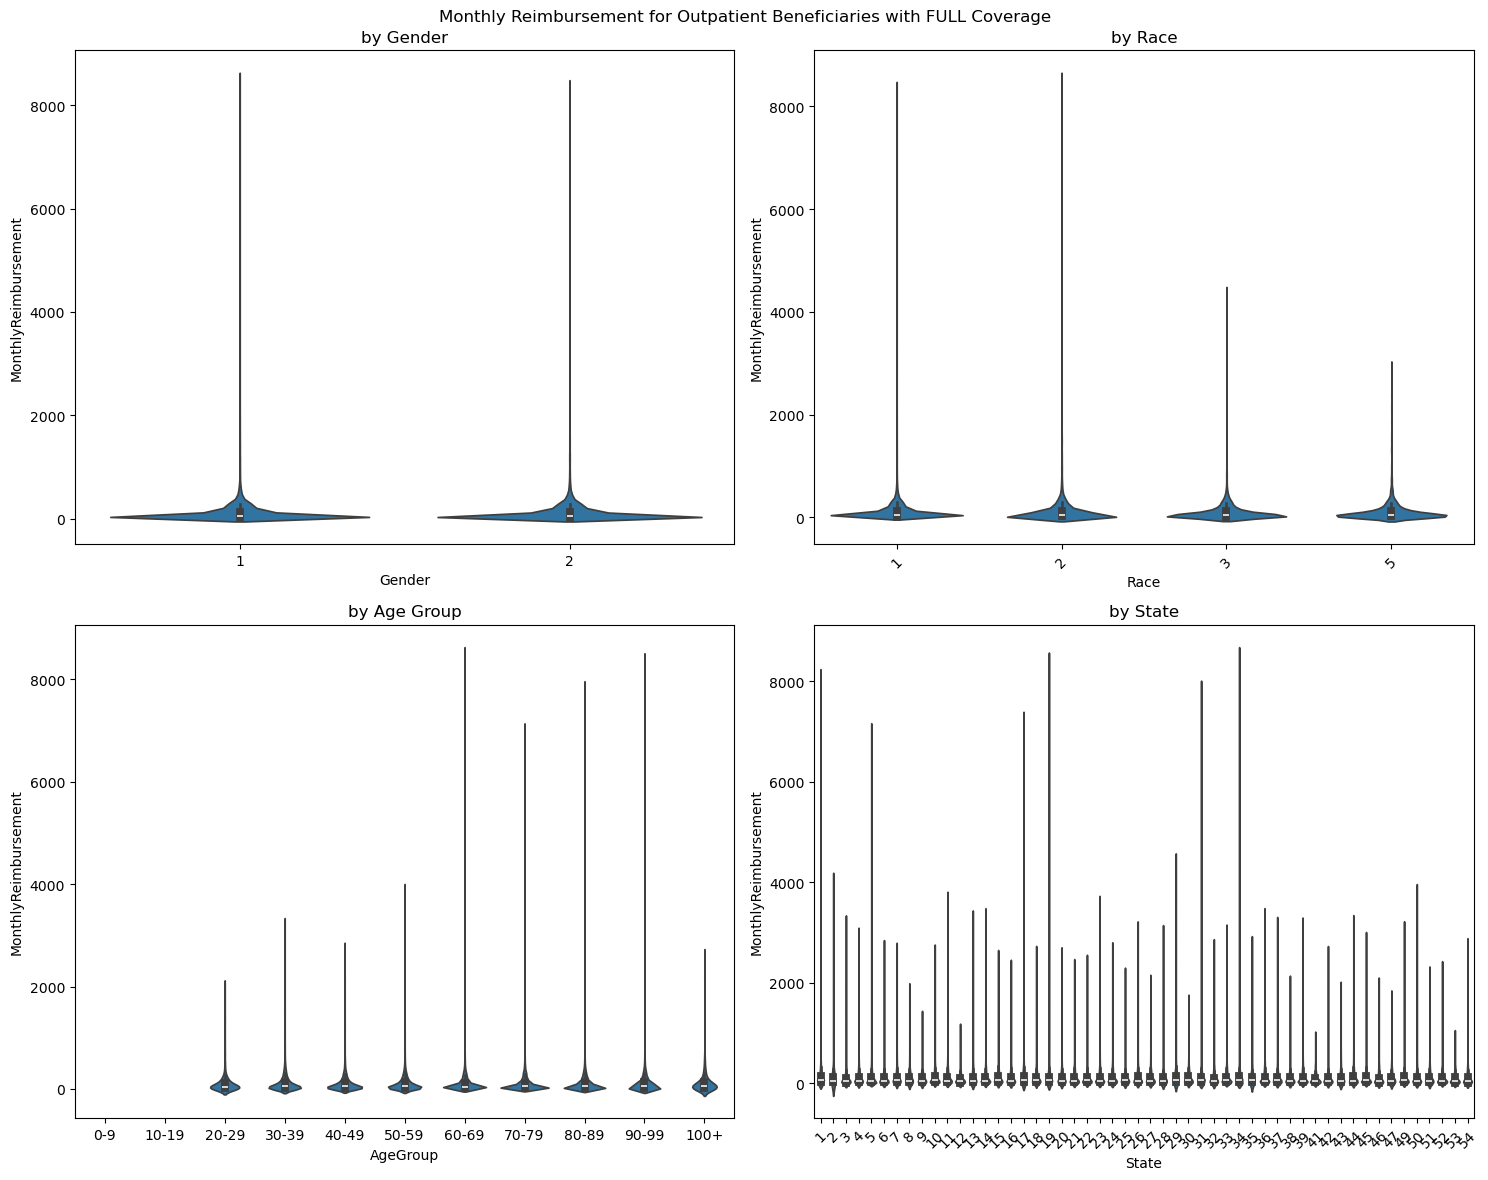

In [308]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_full_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_full_coverage, x='Race', y='MonthlyReimbursement', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_full_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_full_coverage, x='State', y='MonthlyReimbursement', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Monthly Reimbursement for Outpatient Beneficiaries with FULL Coverage')
plt.tight_layout()
plt.show()

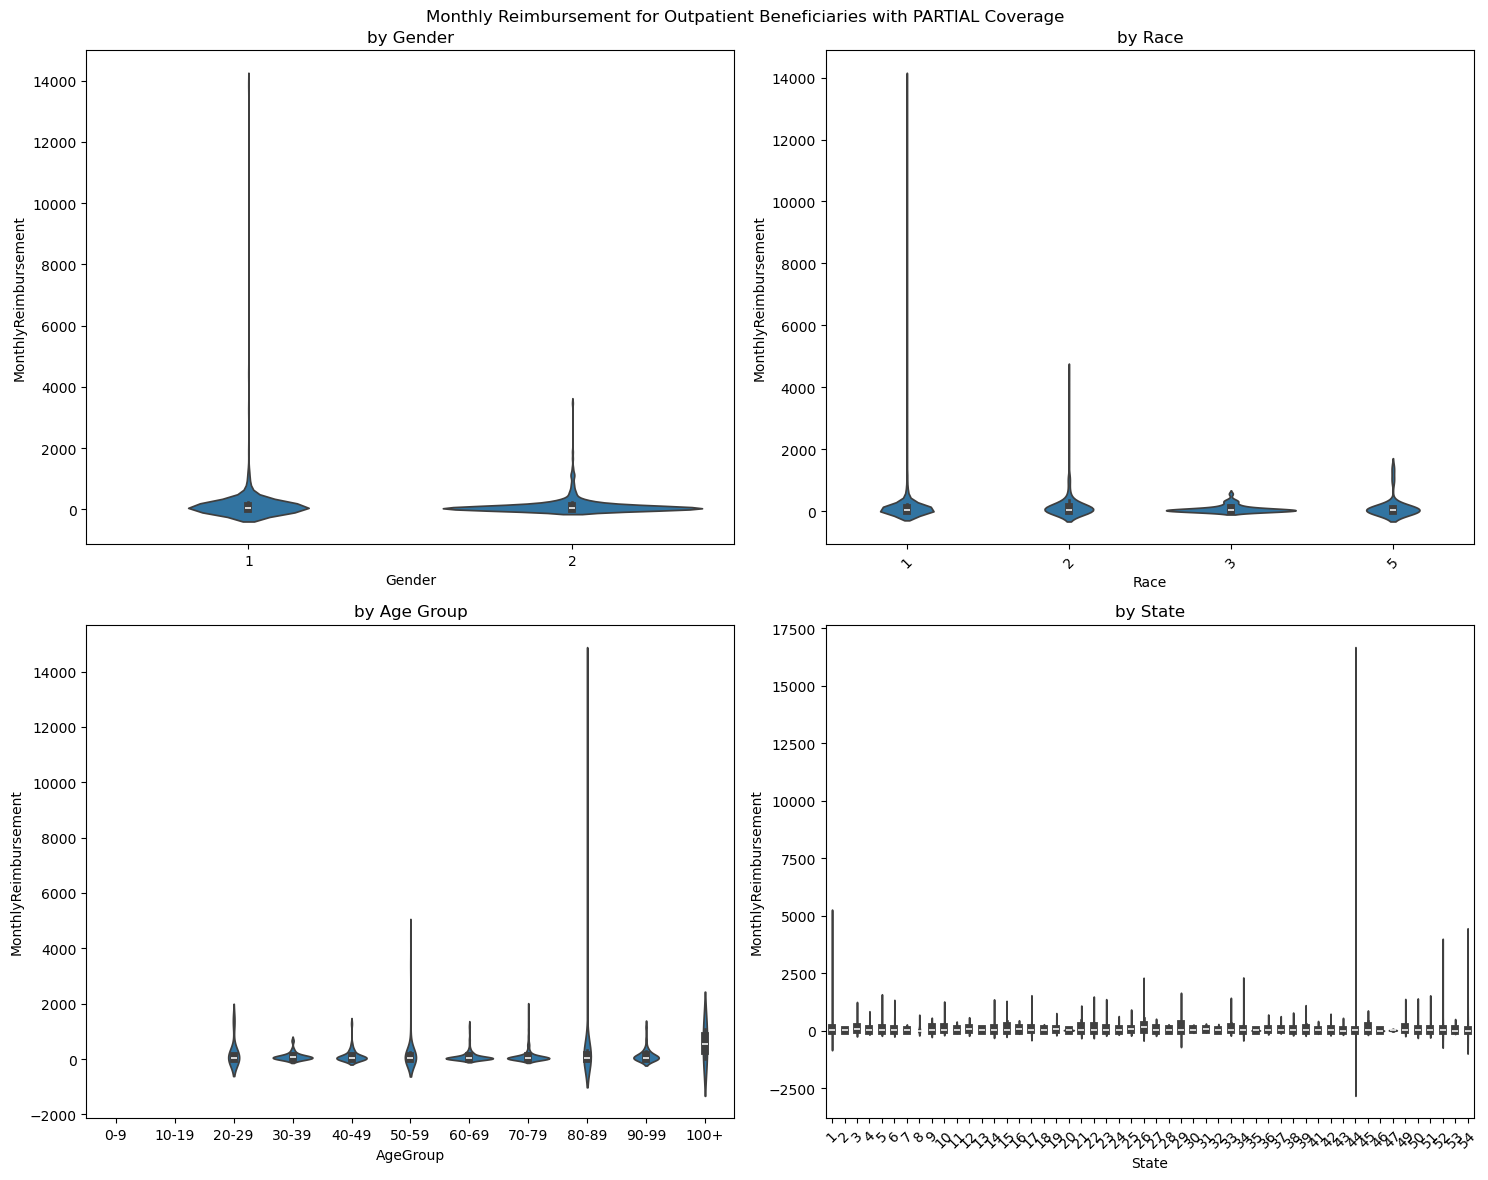

In [310]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_partial_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_partial_coverage, x='Race', y='MonthlyReimbursement', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_partial_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_partial_coverage, x='State', y='MonthlyReimbursement', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Monthly Reimbursement for Outpatient Beneficiaries with PARTIAL Coverage')
plt.tight_layout()
plt.show()

**INPATIENT**

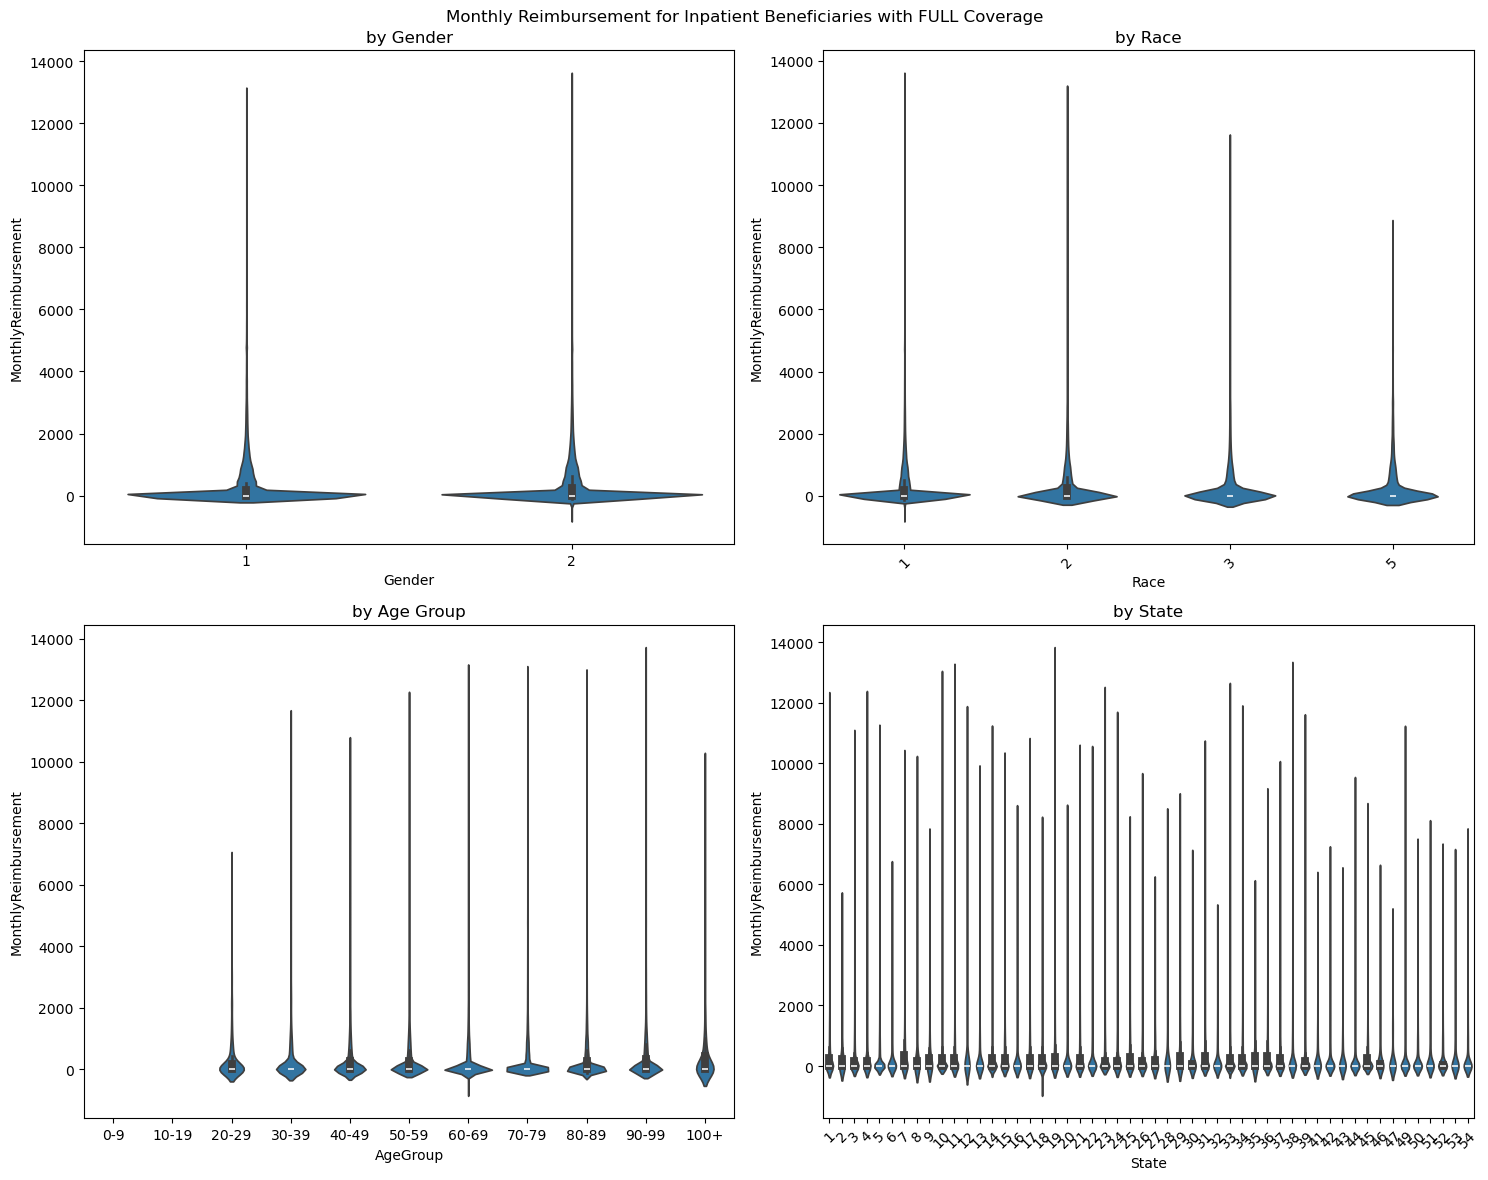

In [321]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_full_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_full_coverage, x='Race', y='MonthlyReimbursement', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_full_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_full_coverage, x='State', y='MonthlyReimbursement', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Monthly Reimbursement for Inpatient Beneficiaries with FULL Coverage')
plt.tight_layout()
plt.show()

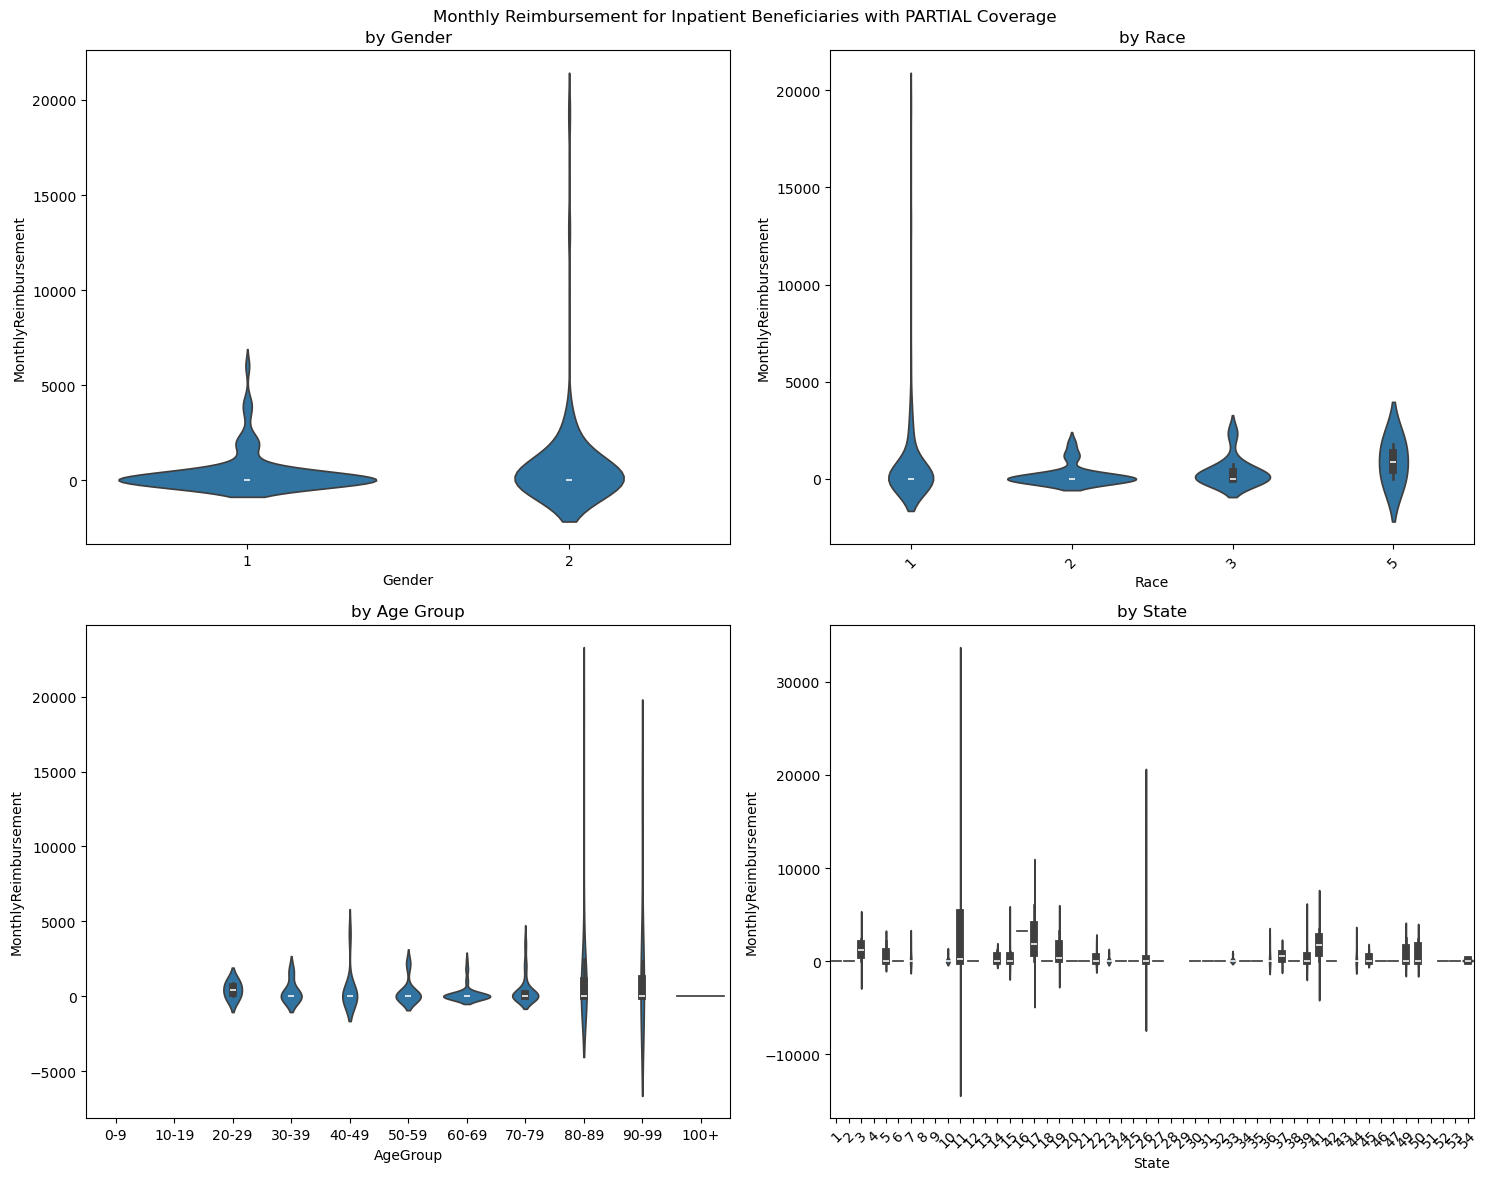

In [323]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_partial_coverage, x='Gender', y='MonthlyReimbursement', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_partial_coverage, x='Race', y='MonthlyReimbursement', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_partial_coverage, x='AgeGroup', y='MonthlyReimbursement', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_partial_coverage, x='State', y='MonthlyReimbursement', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Monthly Reimbursement for Inpatient Beneficiaries with PARTIAL Coverage')
plt.tight_layout()
plt.show()

### Total Cost per Month

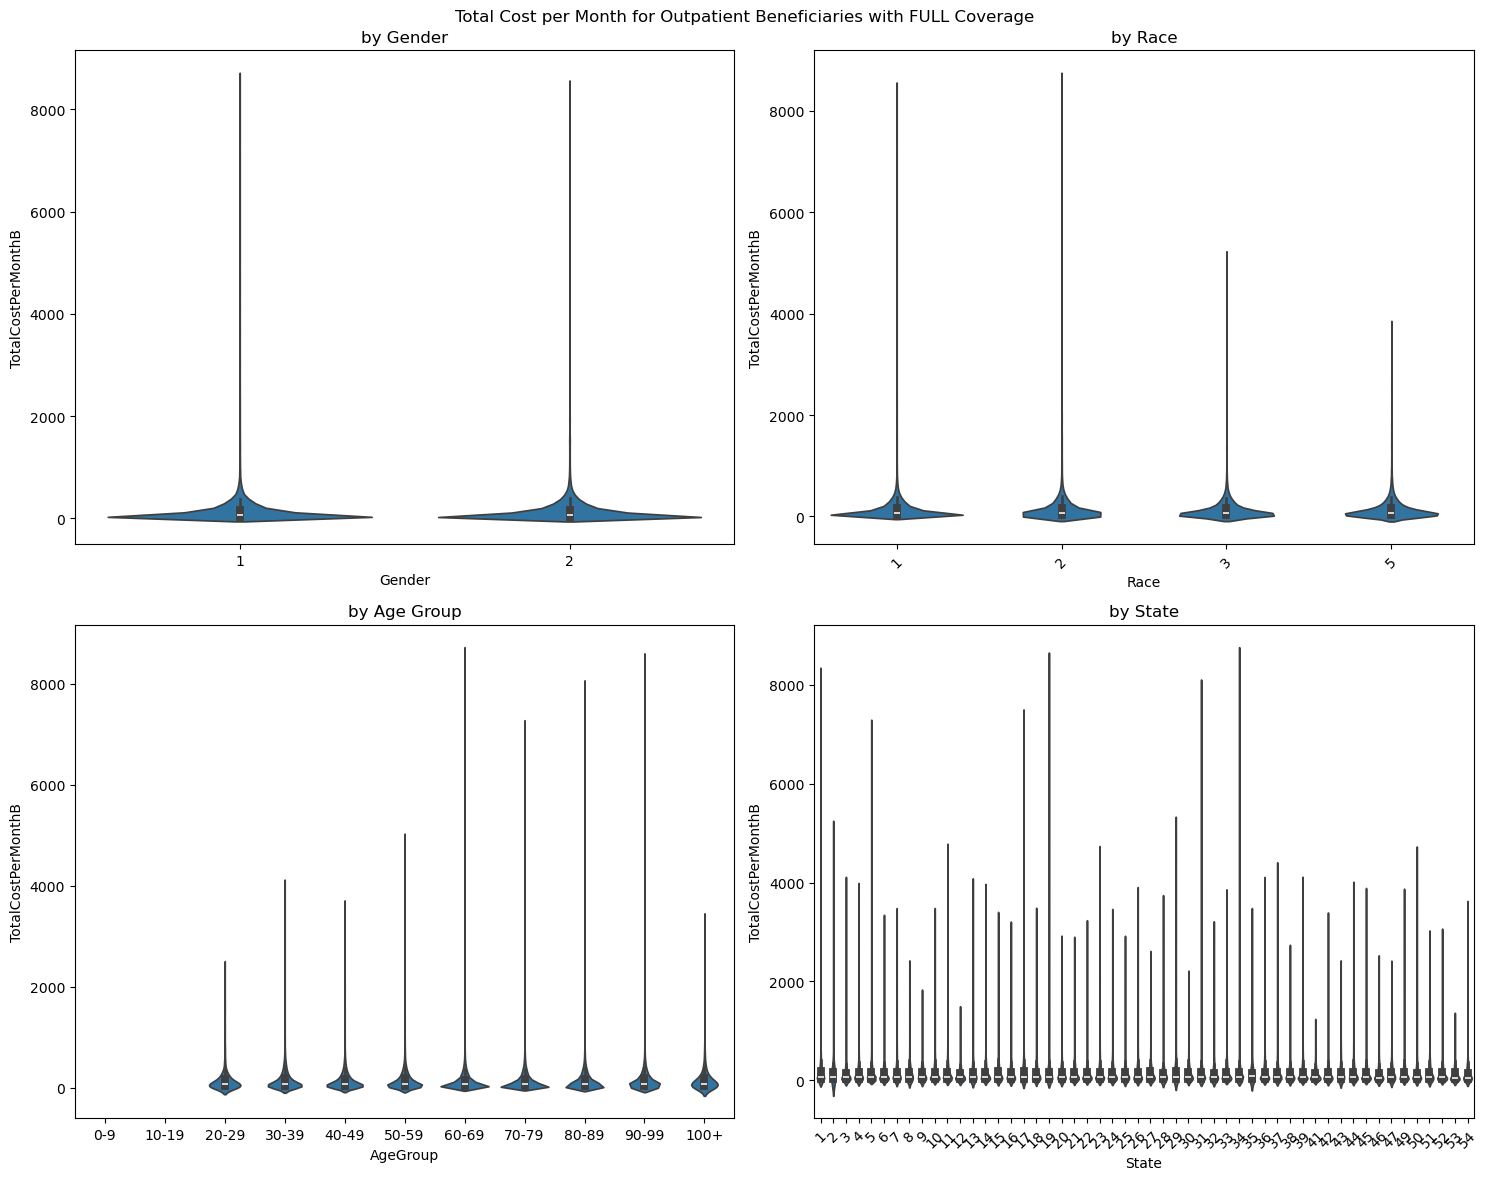

In [317]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_full_coverage, x='Gender', y='TotalCostPerMonthB', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_full_coverage, x='Race', y='TotalCostPerMonthB', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_full_coverage, x='AgeGroup', y='TotalCostPerMonthB', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_full_coverage, x='State', y='TotalCostPerMonthB', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Total Cost per Month for Outpatient Beneficiaries with FULL Coverage')
plt.tight_layout()
plt.show()

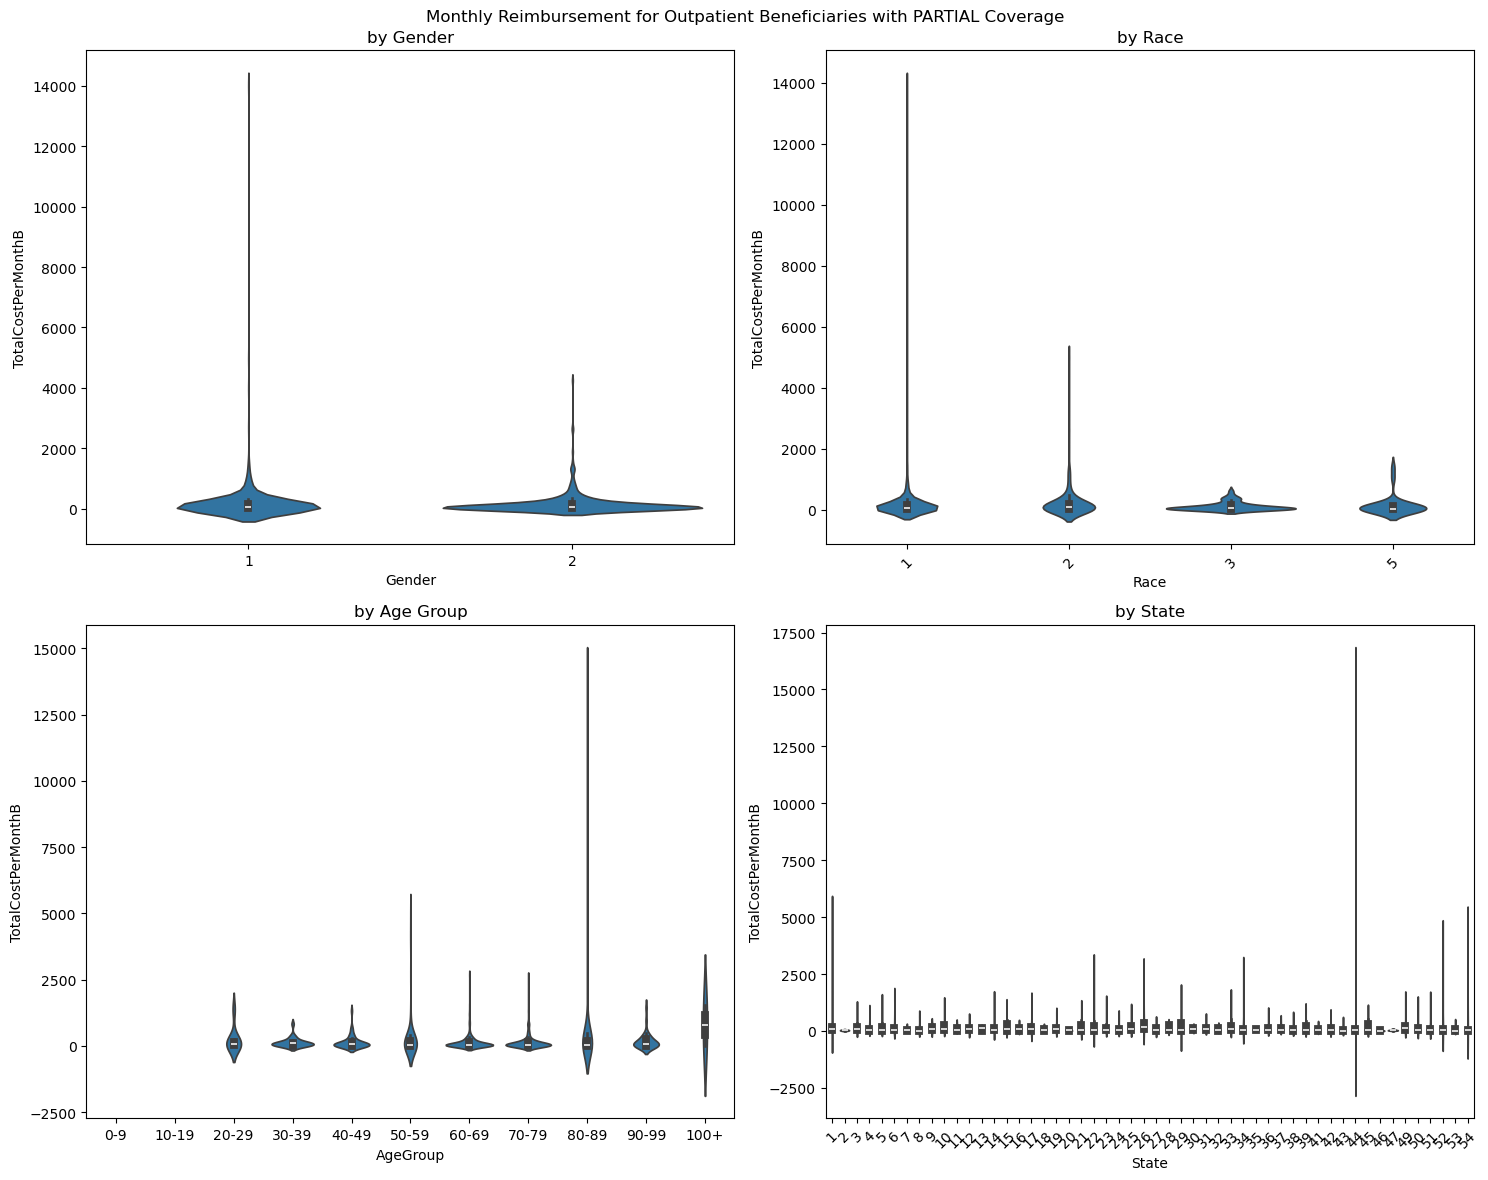

In [319]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_partial_coverage, x='Gender', y='TotalCostPerMonthB', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_partial_coverage, x='Race', y='TotalCostPerMonthB', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_partial_coverage, x='AgeGroup', y='TotalCostPerMonthB', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_partial_coverage, x='State', y='TotalCostPerMonthB', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Monthly Reimbursement for Outpatient Beneficiaries with PARTIAL Coverage')
plt.tight_layout()
plt.show()

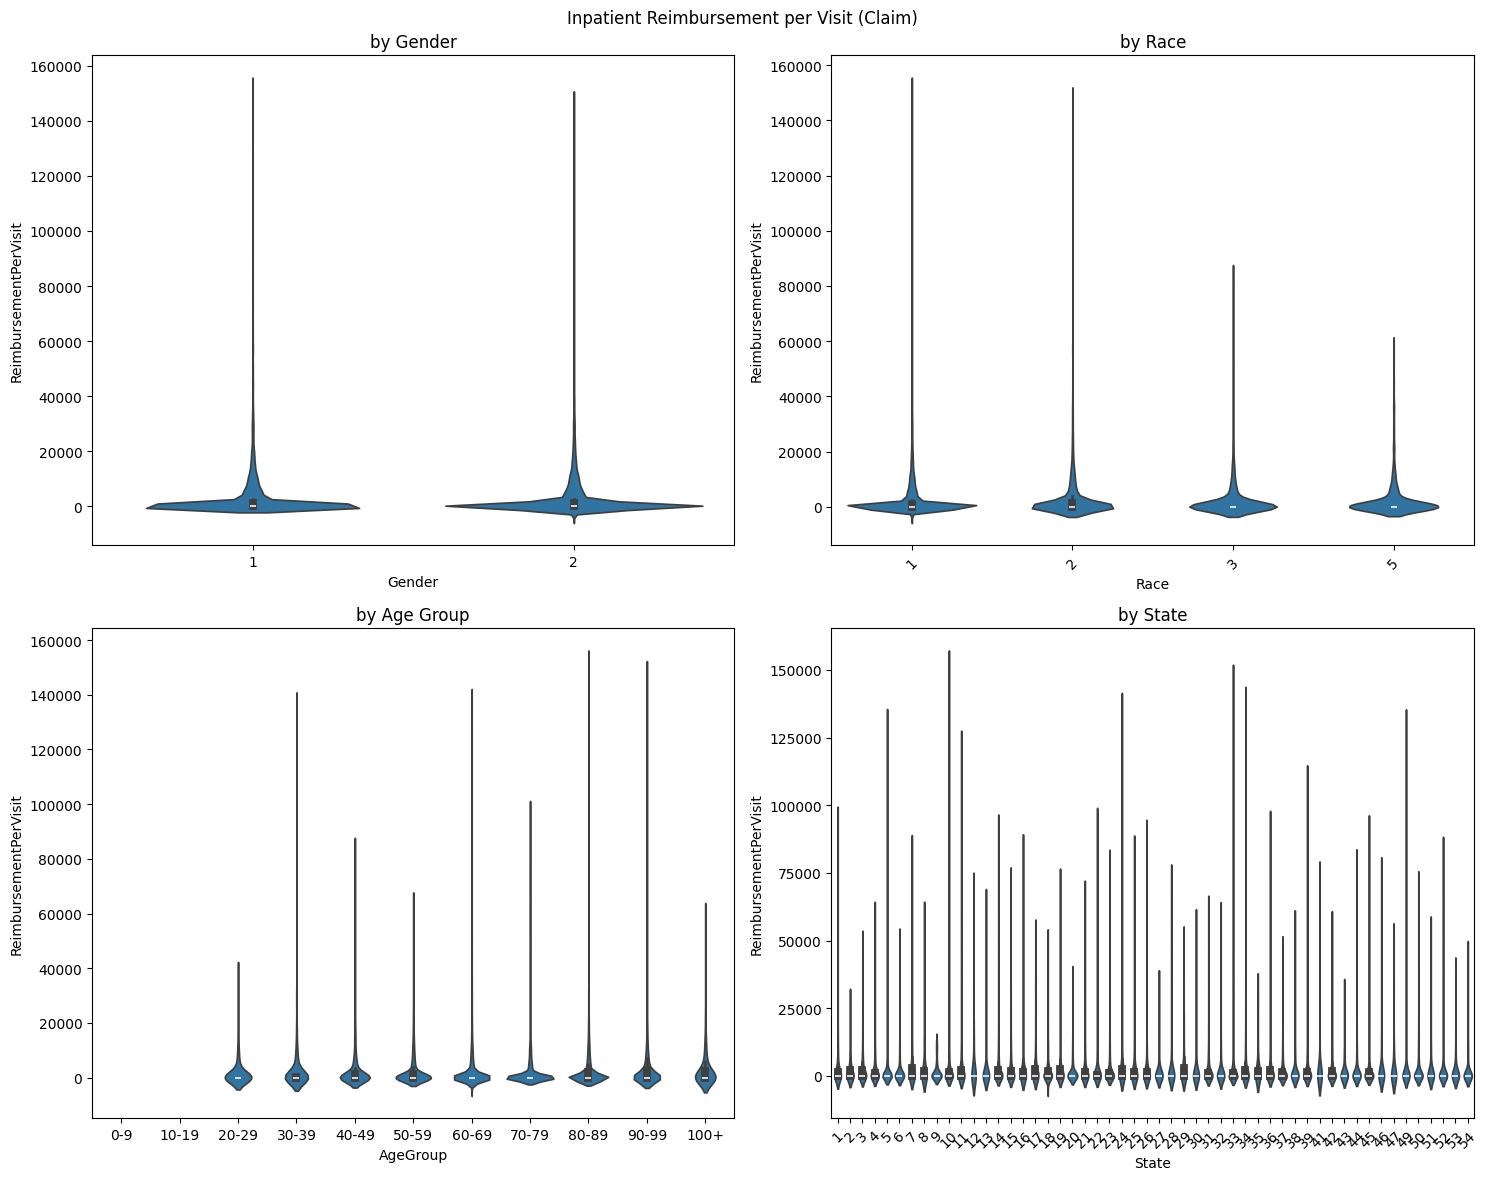

In [266]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=inpatient_resource_usage, x='Gender', y='ReimbursementPerVisit', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=inpatient_resource_usage, x='Race', y='ReimbursementPerVisit', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=inpatient_resource_usage, x='AgeGroup', y='ReimbursementPerVisit', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=inpatient_resource_usage, x='State', y='ReimbursementPerVisit', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Inpatient Reimbursement per Visit (Claim) ')
plt.tight_layout()
plt.show()

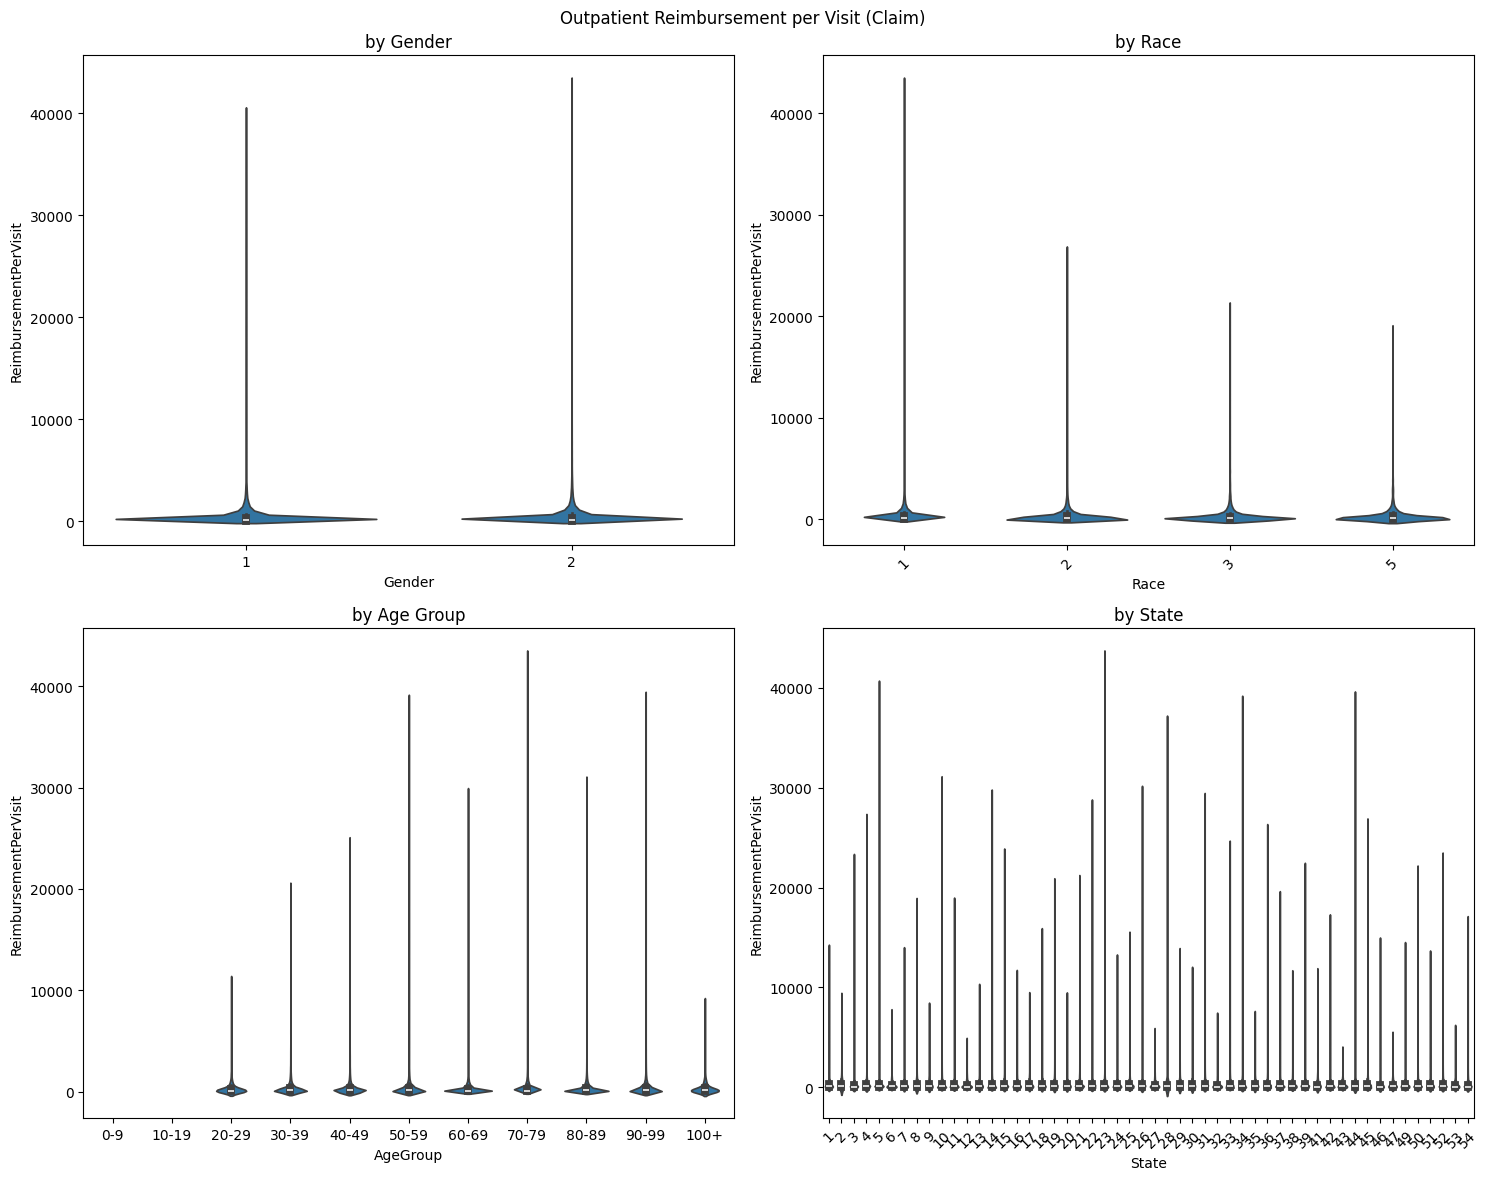

In [268]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# By Gender
sns.violinplot(data=outpatient_resource_usage, x='Gender', y='ReimbursementPerVisit', ax=axes[0, 0])
axes[0, 0].set_title('by Gender')

# By Race
sns.violinplot(data=outpatient_resource_usage, x='Race', y='ReimbursementPerVisit', ax=axes[0, 1])
axes[0, 1].set_title('by Race')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Age Group
sns.violinplot(data=outpatient_resource_usage, x='AgeGroup', y='ReimbursementPerVisit', ax=axes[1, 0])
axes[1, 0].set_title('by Age Group')

# By State
sns.violinplot(data=outpatient_resource_usage, x='State', y='ReimbursementPerVisit', ax=axes[1, 1])
axes[1, 1].set_title('by State')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('Outpatient Reimbursement per Visit (Claim) ')
plt.tight_layout()
plt.show()